In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Part 1: London’s underground resilience

## I. Topological network

#### Preprocessing

In [4]:
# Create an undirected graph of the London Underground.
G = nx.read_graphml('london_updated.graphml')

In [6]:
# Since coords tuples are stored as string, need to convert them back to tuples using eval().
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [12]:
# To check node attributes.
list(G.nodes(data = True))[0]

('Stratford', {'coords': (538524.7855297636, 184373.34100822973)})

In [8]:
# To check edges attributes.
list(G.edges(data = True))[0]

('Stratford',
 'Stratford High Street',
 {'length': 519.300073543952, 'line_name': 'DLR', 'flows': 1089})

In [9]:
# Check the data.
df_1 = nx.to_pandas_edgelist(G)
df_1[0:10]

source                   target       length  \
0              Stratford    Stratford High Street   519.300074   
1              Stratford        Pudding Mill Lane  1137.033257   
2              Stratford  Stratford International  1321.068117   
3              Stratford                 Mile End  2805.001392   
4              Stratford                   Leyton  2131.342926   
5              Stratford         Liverpool Street  6698.461270   
6              Stratford                 Maryland   951.304721   
7              Stratford             Hackney Wick  1572.923279   
8              Stratford                 West Ham  1673.509515   
9  Stratford High Street               Abbey Road   655.211301   

           line_name   flows  
0                DLR    1089  
1                DLR    4261  
2                DLR    3833  
3            Central   11885  
4            Central   56082  
5           TfL Rail  155724  
6           TfL Rail   34442  
7  London Overground    7798  
8            Jubilee   91357  
9                DLR    1206

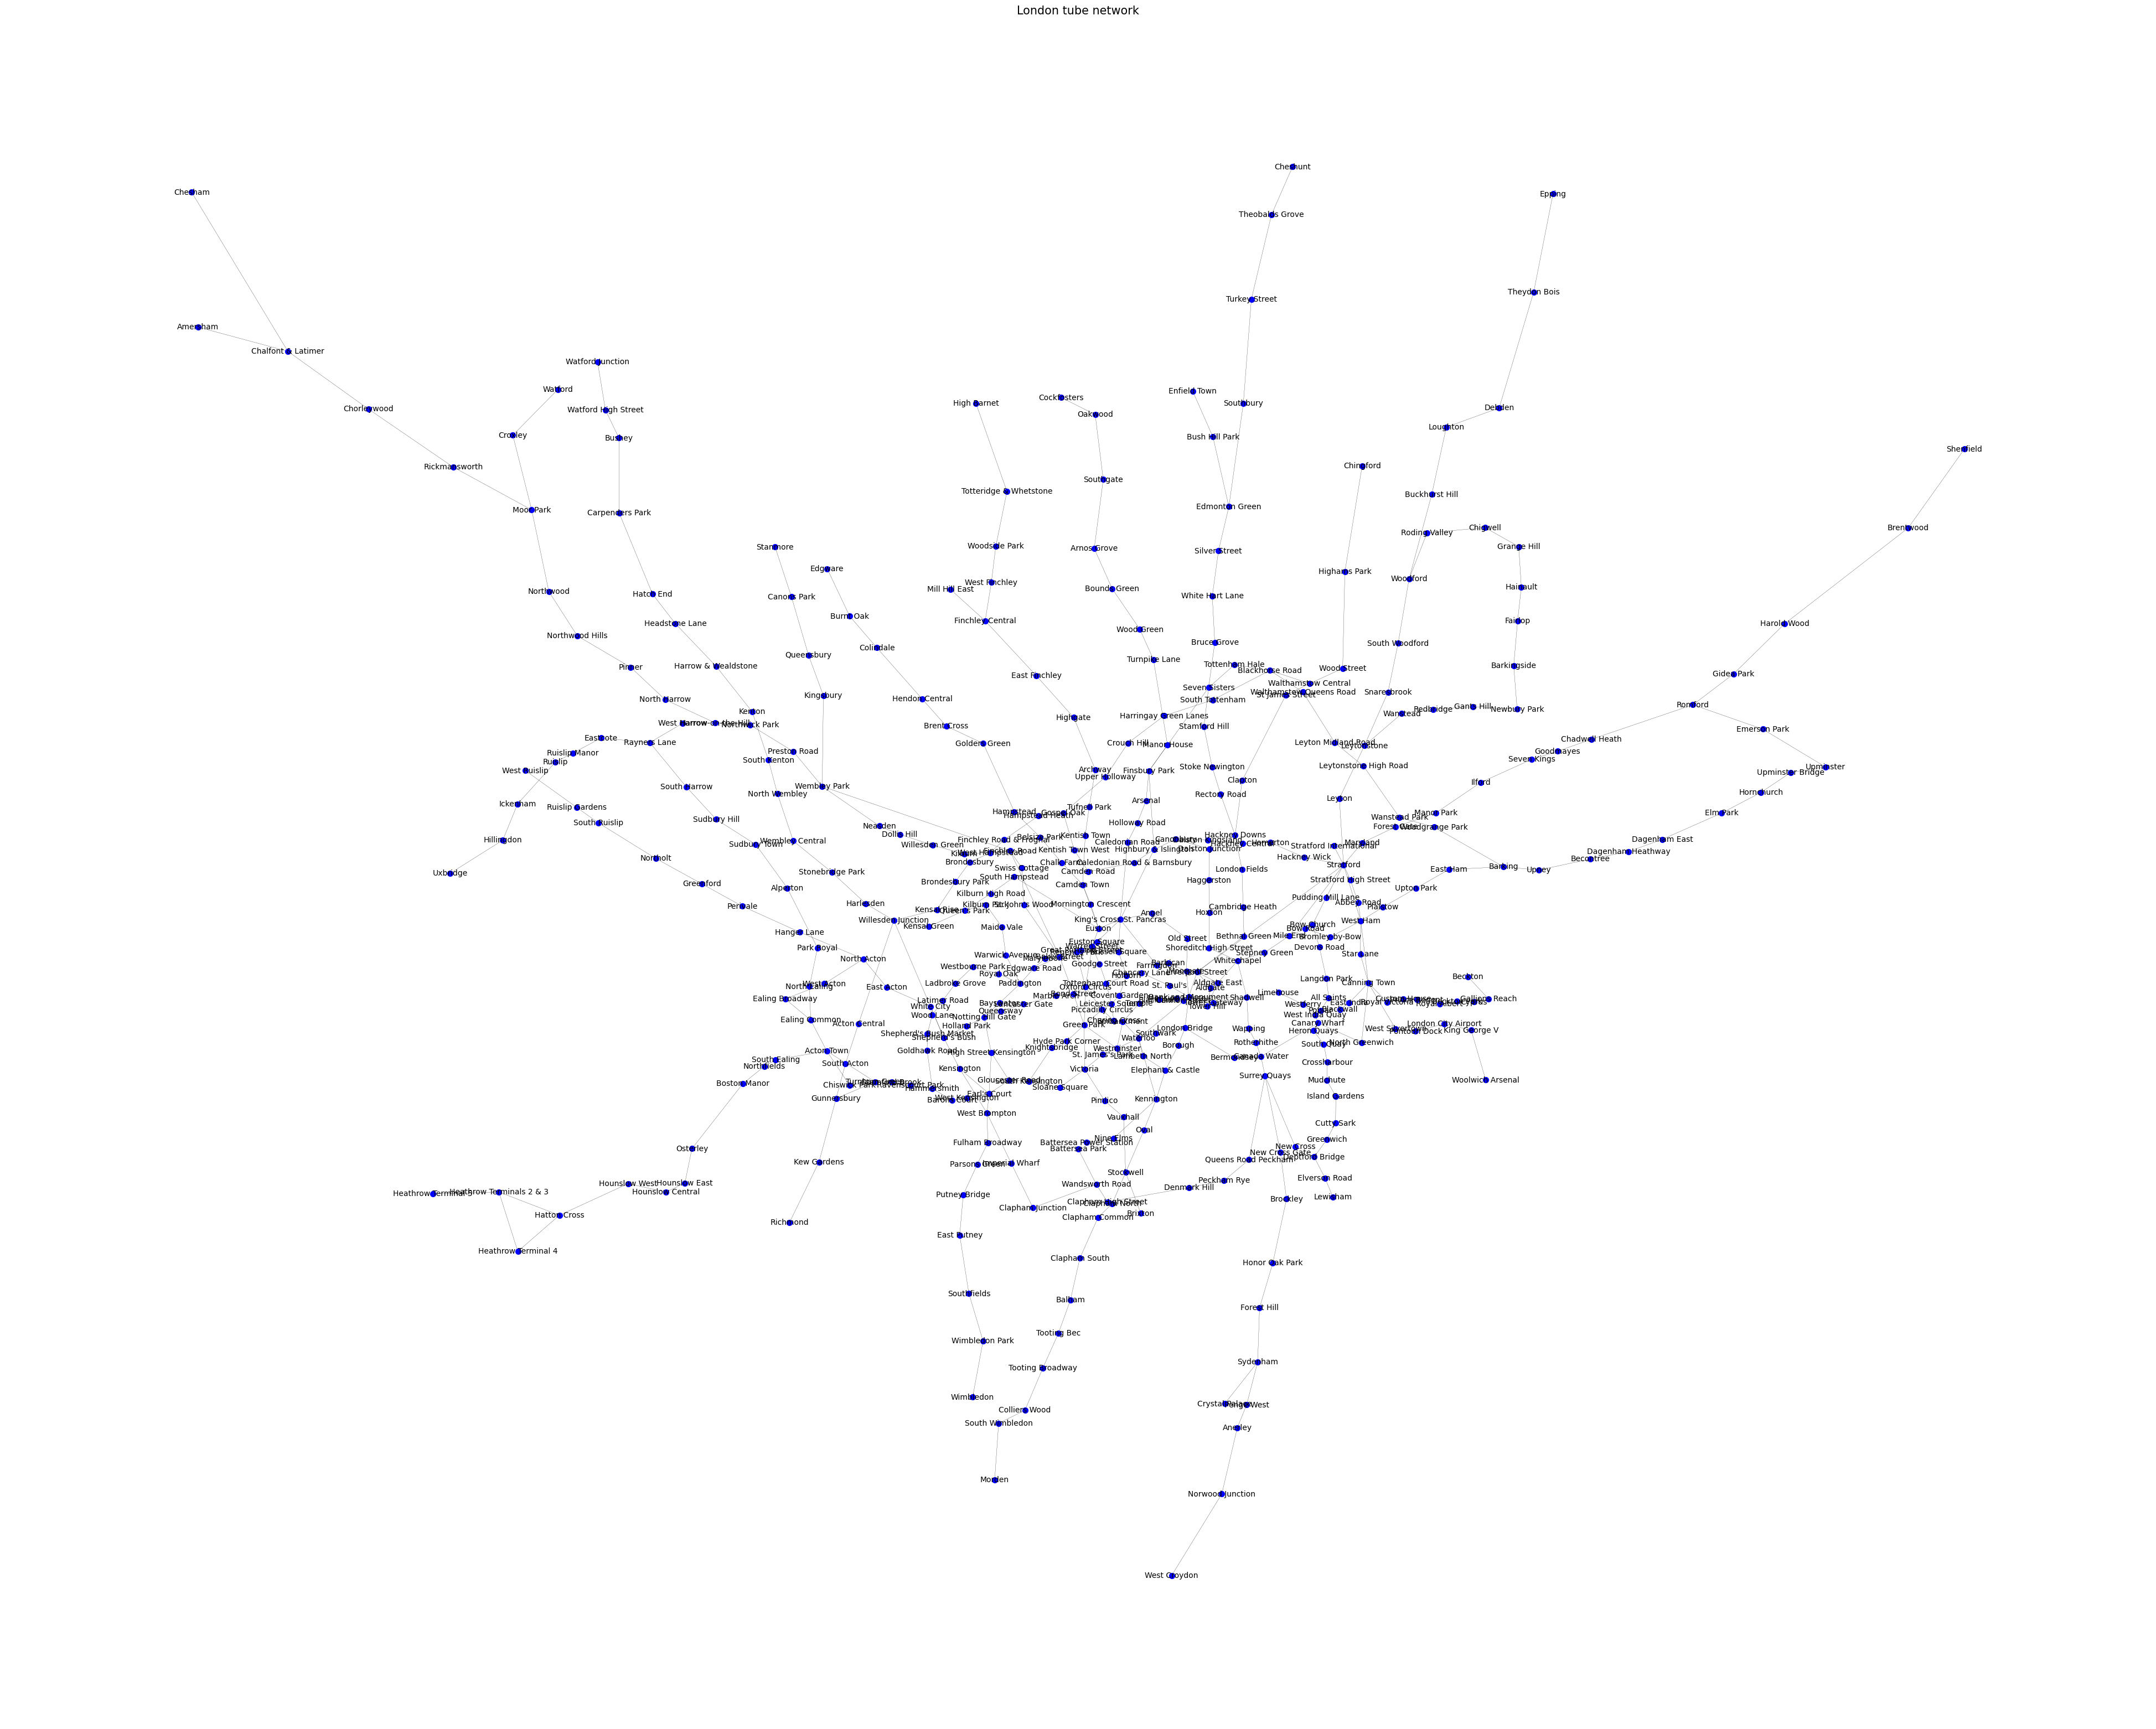

In [14]:
# Plot the tube network with the names of the stations as labels.
fig, ax = plt.subplots(figsize=(50, 40))

node_labels = {node: node for node in G.nodes()}

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='b')
nx.draw_networkx_edges(G, pos, arrows=False, width=0.2)
nx.draw_networkx_labels(G, pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network", fontsize=15)
plt.axis("off")
plt.show()

### I.1. Centrality measures

First try multiple centrality measures and then select the most appropriate three.

#### Degree Centrality

In [17]:
# Calculate the degree centrality.
deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, dict(deg_london), 'degree')

In [18]:
# To dataframe using the nodes as the index.
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

degree
Stratford                 0.0225
Bank and Monument         0.0200
King's Cross St. Pancras  0.0175
Baker Street              0.0175
West Ham                  0.0150
Liverpool Street          0.0150
Canning Town              0.0150
Oxford Circus             0.0150
Waterloo                  0.0150
Green Park                0.0150

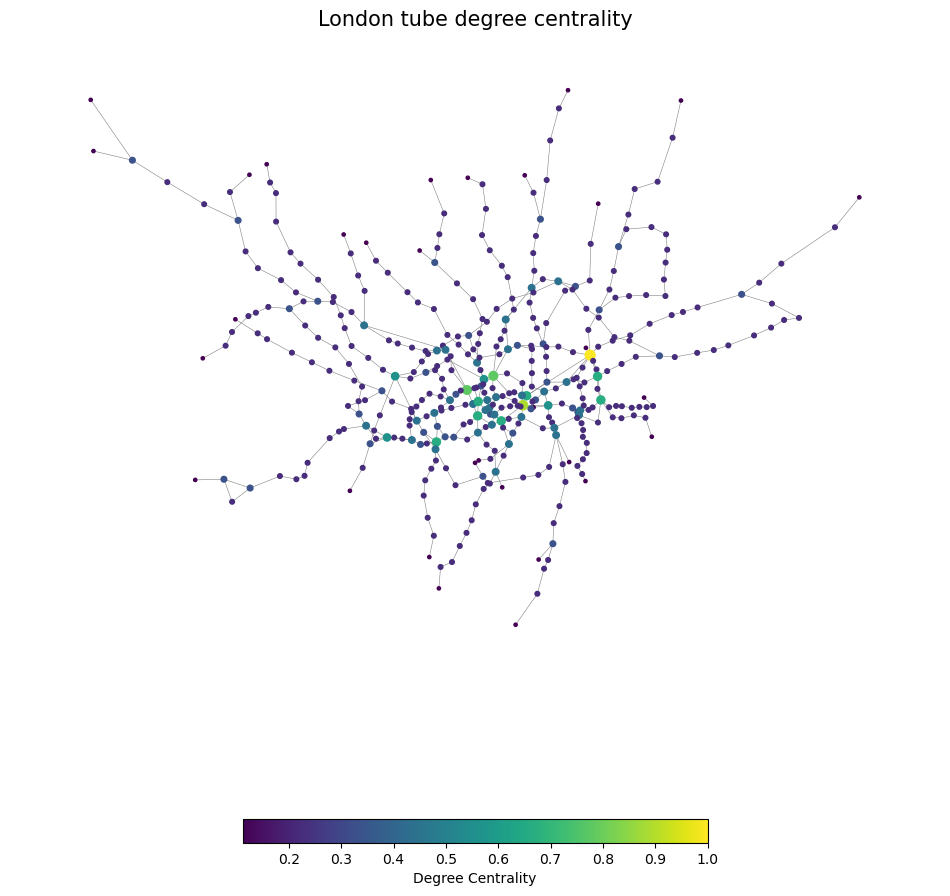

In [19]:
# Set colour and size of nodes according to degree values.
degree_values = [(i[1]['degree']) for i in G.nodes(data=True)]
deg_color = [(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size = [(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph.

pos = pos

fig, ax = plt.subplots(figsize = (12,12))

nx.draw_networkx_edges(G, 
                       pos, 
                       edge_color='gray', 
                       width=0.4)

nod = nx.draw_networkx_nodes(G, 
                             pos=pos, 
                             node_color=deg_color, 
                             cmap=plt.cm.viridis, 
                             node_size=deg_size)

plt.colorbar(nod, label="Degree Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality", fontsize=15)
plt.show()

#### Betweenness Centrality

In [20]:
# Calculate the betweenness centrality.
bet_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G,bet_london,'betweenness')

In [21]:
# Add betweenness centrality to dataframe.
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))

df_sorted = df.sort_values(["betweenness"], ascending=False)
df_sorted[0:10]

degree  betweenness
Stratford                 0.0225     0.297846
Bank and Monument         0.0200     0.290489
Liverpool Street          0.0150     0.270807
King's Cross St. Pancras  0.0175     0.255307
Waterloo                  0.0150     0.243921
Green Park                0.0150     0.215835
Euston                    0.0125     0.208324
Westminster               0.0100     0.203335
Baker Street              0.0175     0.191568
Finchley Road             0.0100     0.165085

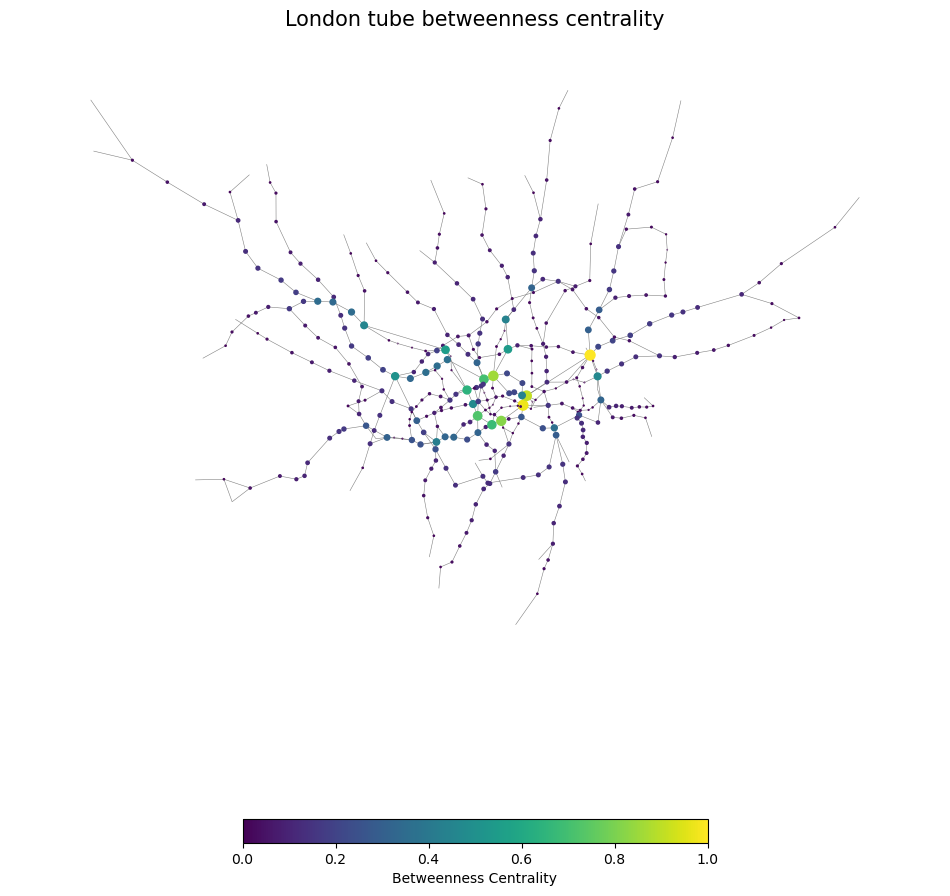

In [22]:
# Set colour and size of nodes according to betweenness values.
betweenness_values = [(i[1]['betweenness']) for i in G.nodes(data=True)]
bet_color = [(i[1]['betweenness']/max(betweenness_values)) for i in G.nodes(data=True)]
bet_size = [(i[1]['betweenness']/max(betweenness_values))*50 for i in G.nodes(data=True)]

# Plot graph.
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edge_color='gray', 
                       width=0.4)

nod=nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_color=bet_color, 
                           cmap=plt.cm.viridis, 
                           node_size=bet_size)

plt.colorbar(nod, label="Betweenness Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality", fontsize=15)
plt.show()

#### Closeness Centrality

In [23]:
# Calculate the closeness centrality.
clo_london = nx.closeness_centrality(G)
nx.set_node_attributes(G, clo_london, 'closeness')

In [24]:
# Add closeness centrality to dataframe.
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))

df_sorted = df.sort_values(["closeness"], ascending=False)
df_sorted[0:10]

degree  betweenness  closeness
Green Park                0.0150     0.215835   0.114778
Bank and Monument         0.0200     0.290489   0.113572
King's Cross St. Pancras  0.0175     0.255307   0.113443
Westminster               0.0100     0.203335   0.112549
Waterloo                  0.0150     0.243921   0.112265
Oxford Circus             0.0150     0.053844   0.111204
Bond Street               0.0100     0.141591   0.110988
Angel                     0.0050     0.064110   0.110742
Farringdon                0.0050     0.064110   0.110742
Moorgate                  0.0100     0.130169   0.110314

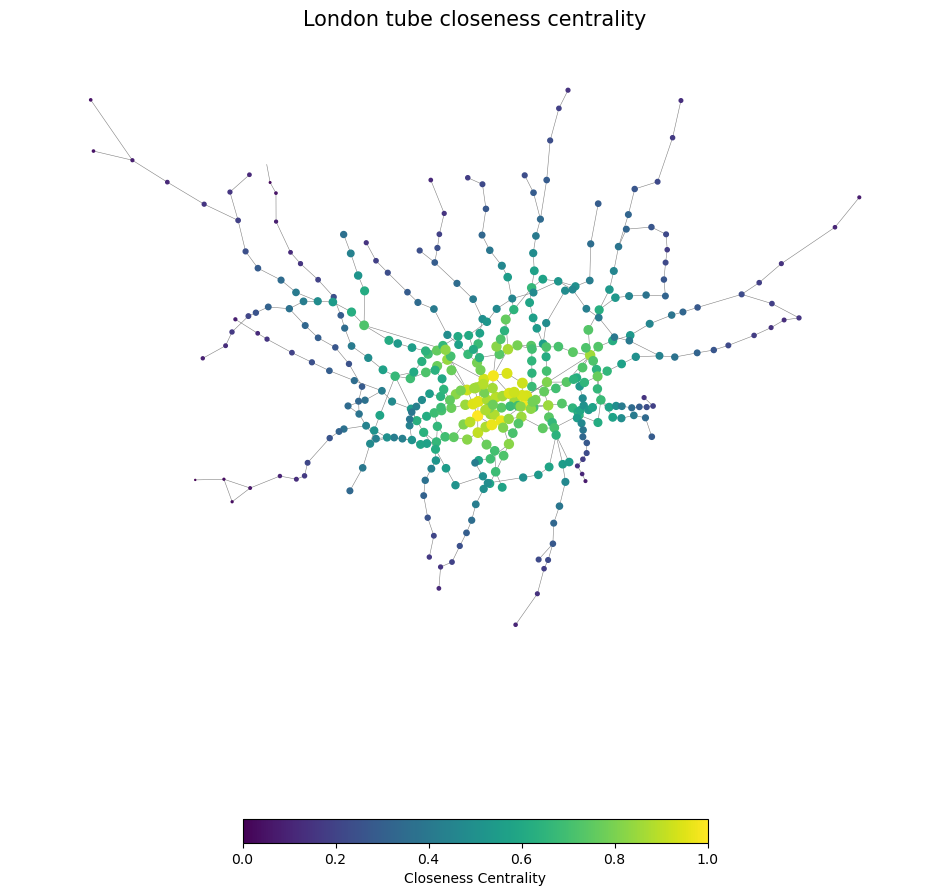

In [25]:
# Set colour and size of nodes according to closeness values.
closeness_values = [(i[1]['closeness']) for i in G.nodes(data=True)]
clo_color = [(i[1]['closeness']-min(closeness_values))/(max(closeness_values)-min(closeness_values)) for i in G.nodes(data=True)]
clo_size = [((i[1]['closeness']-min(closeness_values))/(max(closeness_values)-min(closeness_values))*50) for i in G.nodes(data=True)]

# Plot graph.
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, 
                       pos, 
                       edge_color='gray', 
                       width=0.4)

nod = nx.draw_networkx_nodes(G, 
                             pos=pos, 
                             node_color=clo_color, 
                             cmap=plt.cm.viridis, 
                             node_size=clo_size)

plt.colorbar(nod, label="Closeness Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube closeness centrality", fontsize=15)
plt.show()

#### Eigenvector Centrality

In [27]:
# Calculate the eigenvector centrality.
try:
    # Try using a higher max_iter value.
    egi_london = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
    nx.set_node_attributes(G, egi_london, 'eigenvector')
except nx.PowerIterationFailedConvergence as e:
    print(f"The algorithm failed to converge within the increasing number of iterations: {e}")

In [28]:
# Add eigenvector centrality to dataframe.
df['eigenvector'] = pd.Series(nx.get_node_attributes(G, 'eigenvector'))

df_sorted = df.sort_values(["eigenvector"], ascending=False)
df_sorted[0:10]

degree  betweenness  closeness  eigenvector
Bank and Monument  0.0200     0.290489   0.113572     0.383427
Liverpool Street   0.0150     0.270807   0.110254     0.328824
Stratford          0.0225     0.297846   0.104384     0.269179
Waterloo           0.0150     0.243921   0.112265     0.249731
Moorgate           0.0100     0.130169   0.110314     0.215137
Green Park         0.0150     0.215835   0.114778     0.197630
Oxford Circus      0.0150     0.053844   0.111204     0.184094
Tower Hill         0.0075     0.002399   0.102276     0.171676
Westminster        0.0100     0.203335   0.112549     0.168610
Shadwell           0.0125     0.045432   0.103842     0.159090

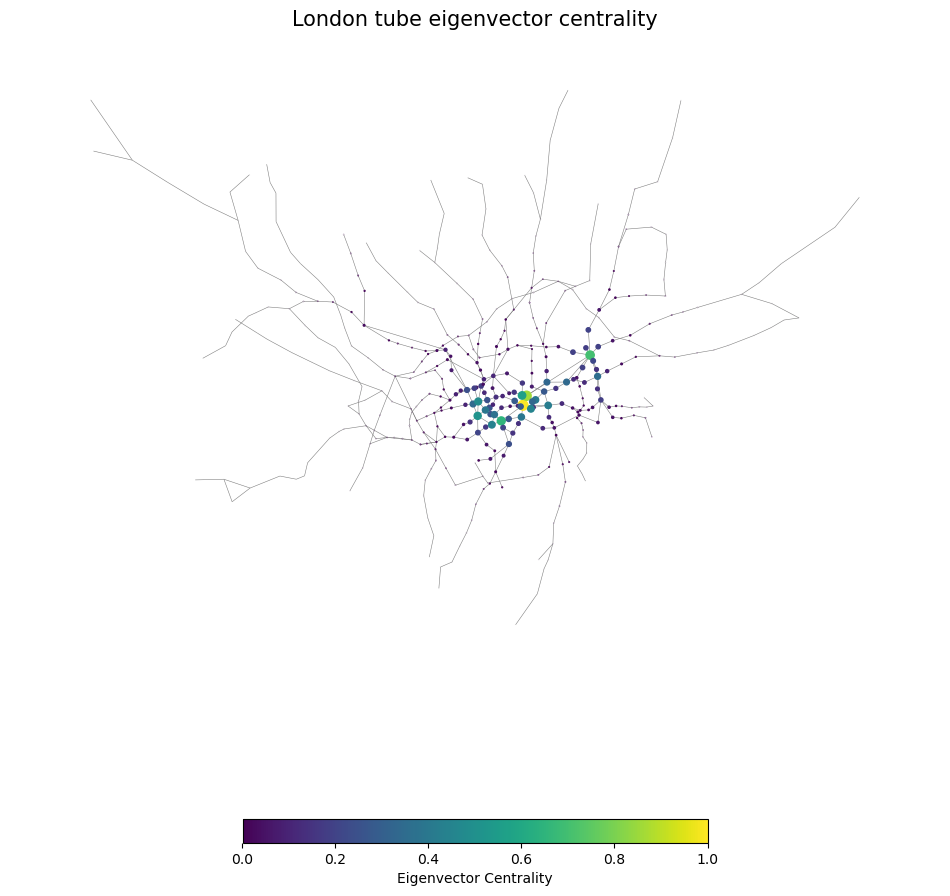

In [29]:
# Set colour and size of nodes according to eigenvector values.
eigenvector_values = [(i[1]['eigenvector']) for i in G.nodes(data=True)]
egi_color = [(i[1]['eigenvector'])/(max(eigenvector_values)) for i in G.nodes(data=True)]
egi_size = [(i[1]['eigenvector'])/(max(eigenvector_values))*50 for i in G.nodes(data=True)]

# Plot graph.
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, 
                       pos, 
                       edge_color='gray', 
                       width=0.4)

nod = nx.draw_networkx_nodes(G, 
                             pos=pos, 
                             node_color=egi_color, 
                             cmap=plt.cm.viridis, 
                             node_size=egi_size)

plt.colorbar(nod, label="Eigenvector Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube eigenvector centrality", fontsize=15)
plt.show()

#### Summary

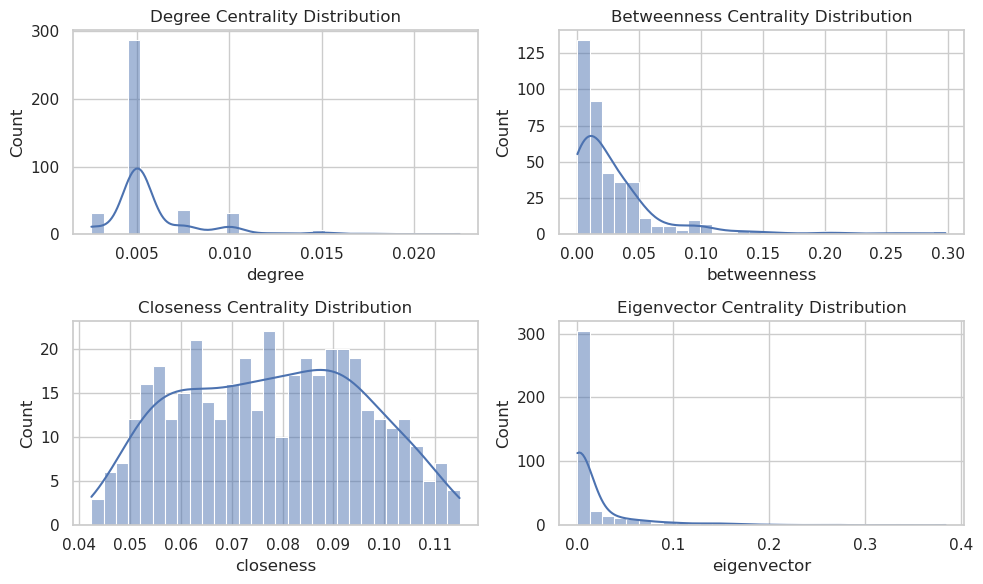

In [30]:
# Plot the distribution of centralities.
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# degree centrality distribution
sns.histplot(data=df, x="degree", bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Degree Centrality Distribution")

# betweenness centrality distribution
sns.histplot(data=df, x="betweenness", bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Betweenness Centrality Distribution")

# close centrality distribution
sns.histplot(data=df, x="closeness", bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Closeness Centrality Distribution")

# eigenvector centrality distribution
sns.histplot(data=df, x="eigenvector", bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Eigenvector Centrality Distribution")

plt.tight_layout()
plt.show()

In [34]:
# Rank each type of centrality and extract the top ten.
top_degree = df.nlargest(10, 'degree')[['degree']]
top_betweenness = df.nlargest(10, 'betweenness')[['betweenness']]
top_closeness = df.nlargest(10, 'closeness')[['closeness']]
top_eigenvector = df.nlargest(10, 'eigenvector')[['eigenvector']]

top_degree.reset_index(inplace=True)
top_betweenness.reset_index(inplace=True)
top_closeness.reset_index(inplace=True)
top_eigenvector.reset_index(inplace=True)

top_centralities = pd.concat([top_degree, top_betweenness, top_closeness, top_eigenvector], axis=1)

top_centralities

index  degree                     index  betweenness  \
0                 Stratford  0.0225                 Stratford     0.297846   
1         Bank and Monument  0.0200         Bank and Monument     0.290489   
2  King's Cross St. Pancras  0.0175          Liverpool Street     0.270807   
3              Baker Street  0.0175  King's Cross St. Pancras     0.255307   
4                  West Ham  0.0150                  Waterloo     0.243921   
5              Canning Town  0.0150                Green Park     0.215835   
6             Oxford Circus  0.0150                    Euston     0.208324   
7          Liverpool Street  0.0150               Westminster     0.203335   
8                  Waterloo  0.0150              Baker Street     0.191568   
9                Green Park  0.0150             Finchley Road     0.165085   

                      index  closeness              index  eigenvector  
0                Green Park   0.114778  Bank and Monument     0.383427  
1         Bank and Monument   0.113572   Liverpool Street     0.328824  
2  King's Cross St. Pancras   0.113443          Stratford     0.269179  
3               Westminster   0.112549           Waterloo     0.249731  
4                  Waterloo   0.112265           Moorgate     0.215137  
5             Oxford Circus   0.111204         Green Park     0.197630  
6               Bond Street   0.110988      Oxford Circus     0.184094  
7                     Angel   0.110742         Tower Hill     0.171676  
8                Farringdon   0.110742        Westminster     0.168610  
9                  Moorgate   0.110314           Shadwell     0.159090

### I.2. Impact measures

#### Global Efficiency

In [35]:
# Taking G as an example to calculate the global efficiency.
global_eff = nx.global_efficiency(G)
print("Global Efficiency of the network G is:", global_eff)

Global Efficiency of the network G is: 0.10125619359720932


#### Normalized Largest Connected Component

In [37]:
# Taking G as an example to calculate the NLCC.

# Compute all connected components.
connected_components = list(nx.connected_components(G))

# Find the largest connected component.
largest_cc = max(connected_components, key=len)

# Compute the size of the normalized largest connected component.
NLCC = len(largest_cc) / G.number_of_nodes()

print("Normalized Largest Connected Component size of the network G is:", NLCC)

Normalized Largest Connected Component size of the network G is: 1.0


In [38]:
def calculate_nlcc(G):
    """
    Calculate the Normalized Largest Connected Component (NLCC) size of a graph.

    Parameters:
    - G: A NetworkX graph object (undirected).

    Returns:
    - The size of the largest connected component, normalized by the total number of nodes in the graph.
    """
    # Make sure G is an undirected graph.
    if G.is_directed():
        raise ValueError("G must be an undirected graph.")

    # Compute all connected components.
    connected_components = list(nx.connected_components(G))
    
    # Find the largest connected component.
    largest_cc = max(connected_components, key=len)
    
    # Compute the size of the normalized largest connected component.
    normalized_largest_cc_size = len(largest_cc) / G.number_of_nodes()
    
    return normalized_largest_cc_size

### I.3. Node removal

#### A) Non-sequential removal

In [39]:
# To check node attributes.
list(G.nodes(data = True))[0]

('Stratford',
 {'coords': (538524.7855297636, 184373.34100822973),
  'degree': 0.0225,
  'betweenness': 0.2978457823852564,
  'closeness': 0.10438413361169102,
  'eigenvector': 0.26917936110280577})

In [40]:
# Plotting functions for visualizing centrality.
def plot_result_network(G, measure):

    values = [data[measure] for _, data in G.nodes(data=True)]
    min_value, max_value = min(values), max(values)
    
    color = [(value - min_value) / (max_value - min_value) for value in values]
    size = [((value - min_value) / (max_value - min_value) * 50) + 10 for value in values]  # 添加基础大小以避免太小的节点
    
    fig, ax = plt.subplots(figsize=(12, 12))
    pos = nx.get_node_attributes(G, 'coords')

    nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4)

    nodes = nx.draw_networkx_nodes(G, pos, node_color=color, cmap=plt.cm.viridis, node_size=size)

    plt.colorbar(nodes, label=f"{measure.capitalize()} Centrality", orientation="horizontal", shrink=0.5)

    plt.axis("off")
    plt.title(f"Network {measure.capitalize()} Centrality", fontsize=15)
    plt.show()

In [44]:
# Plotting function for visualizing connected components.
def plot_result_network_cc(G, measure):
    # Get all connected components of G.
    connected_components = list(nx.connected_components(G))
    
    plt.figure(figsize=(30, 30))
    
    for i, nodes in enumerate(connected_components):
        # Extract the subgraph of the current connected components.
        subgraph = G.subgraph(nodes)
        
        # Generate layout for subgraphs.
        pos = nx.get_node_attributes(G, 'coords')

        node_labels = {node: node for node in G.nodes()}

        nx.draw_networkx_edges(subgraph, pos, edge_color='gray', width=0.4)
        nx.draw_networkx_nodes(subgraph, pos, node_color=f'C{i}', node_size=50)
        nx.draw_networkx_labels(subgraph, pos, node_labels, font_size=7, font_color='black')
    
    plt.axis('off')
    plt.title(f'Connected Components of {measure.capitalize()} Centrality', fontsize=15)
    plt.show()

In [49]:
# List of centrality measures.
measure_names = ['degree', 'betweenness', 'closeness', 'eigenvector']

# Data structure to store results.
results_a = []

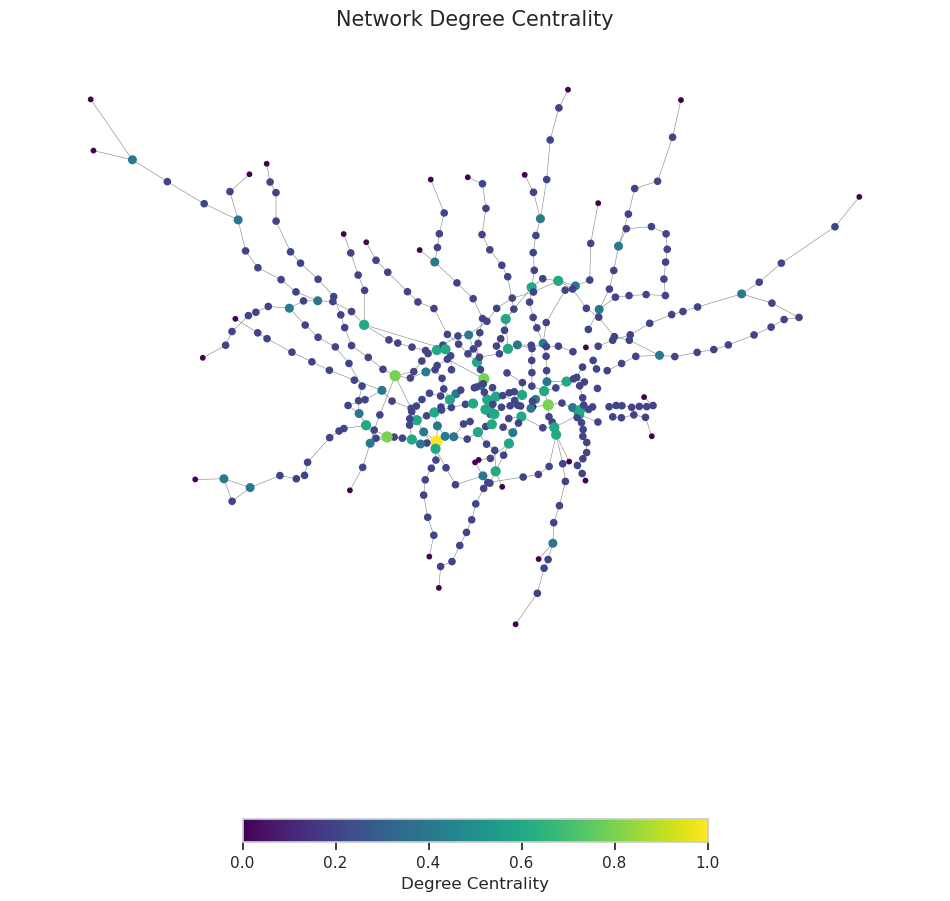

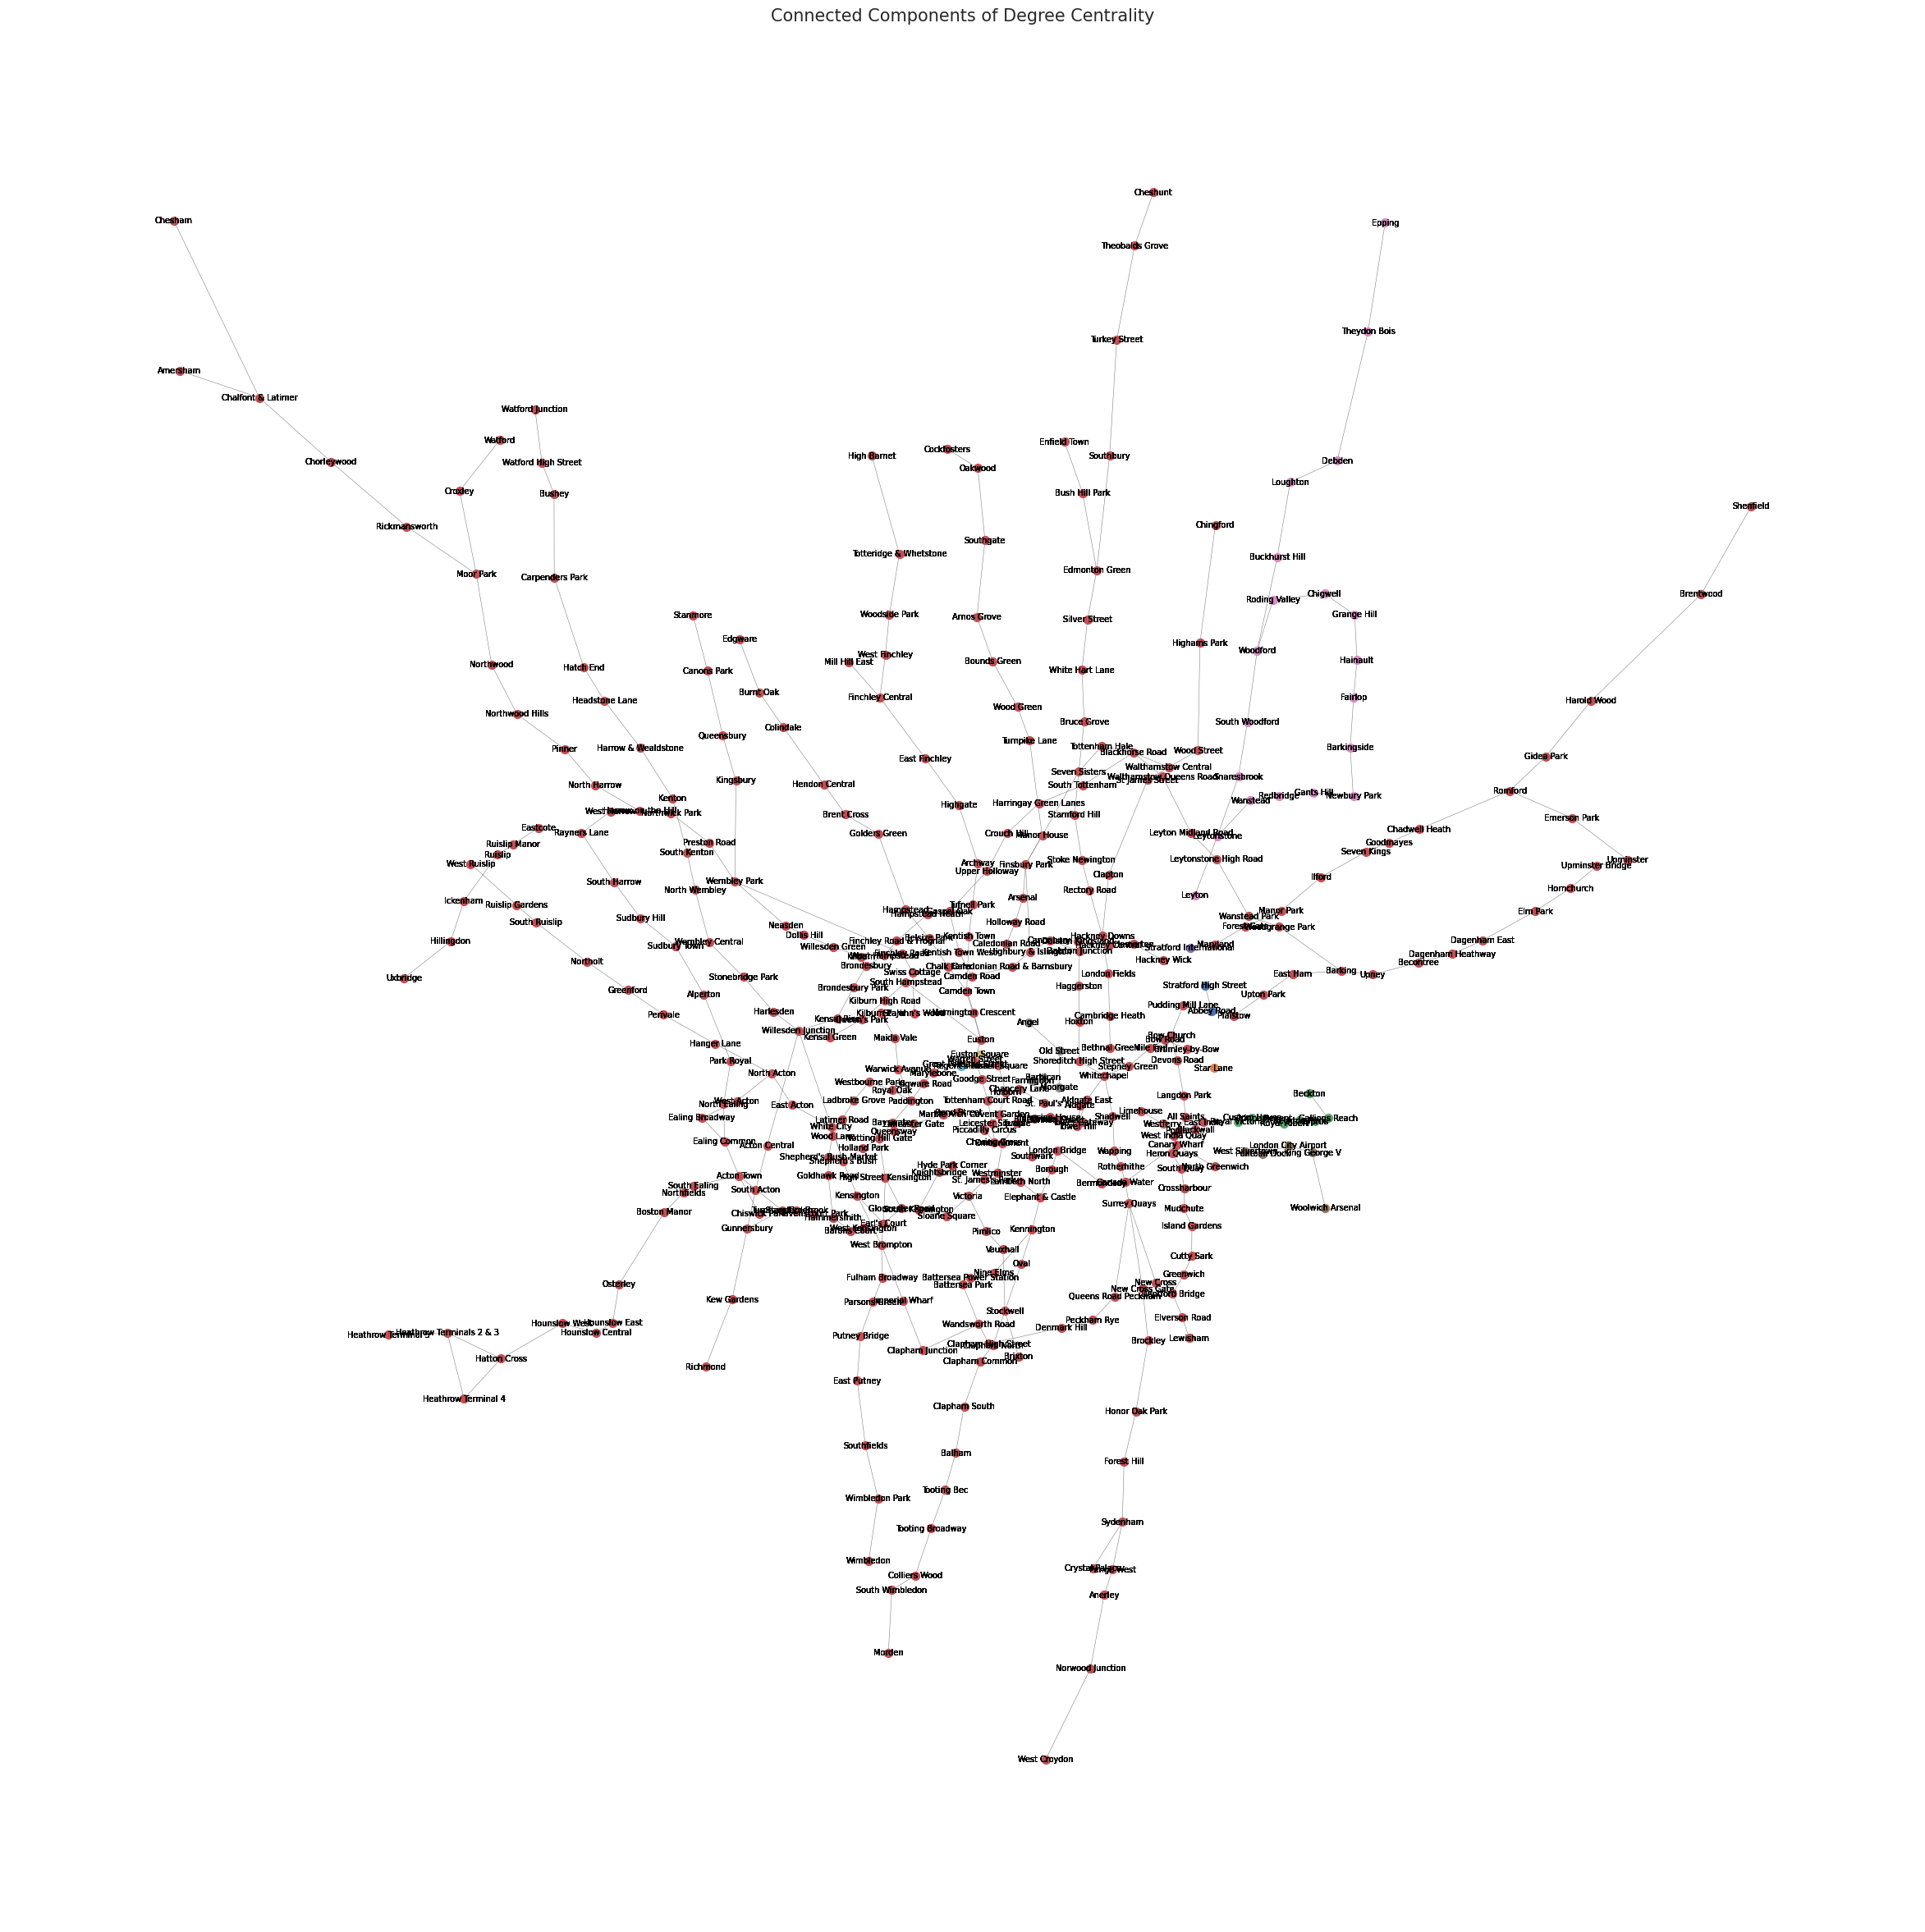

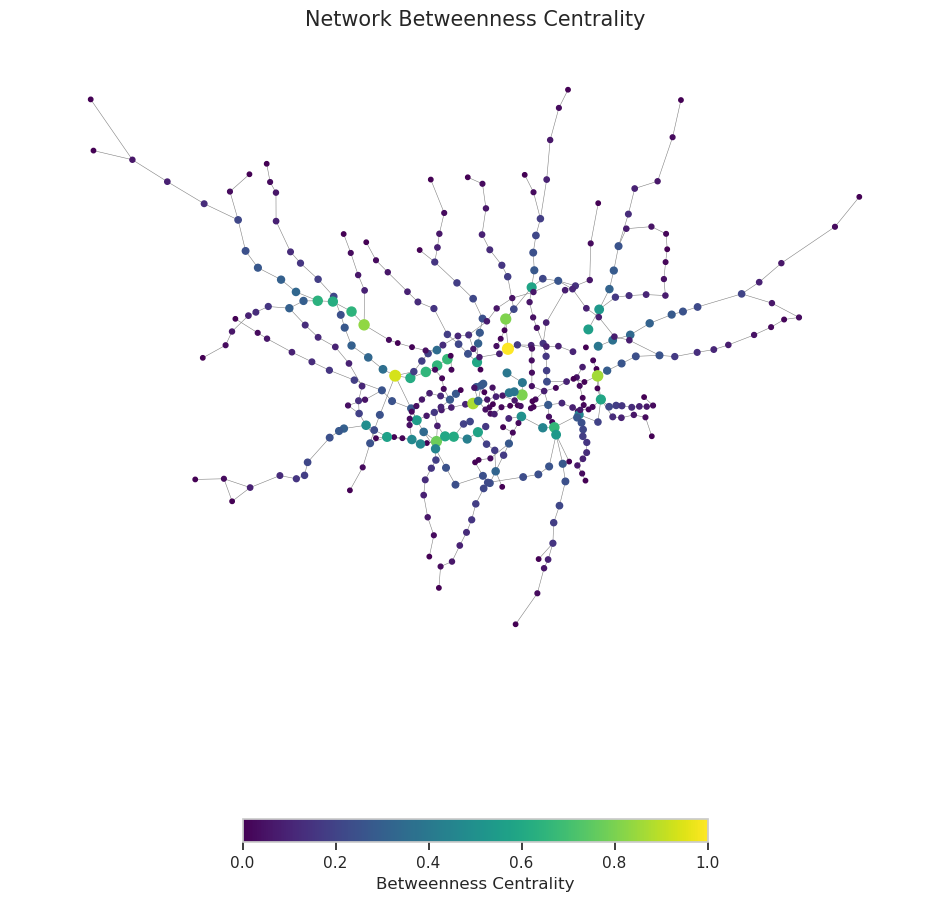

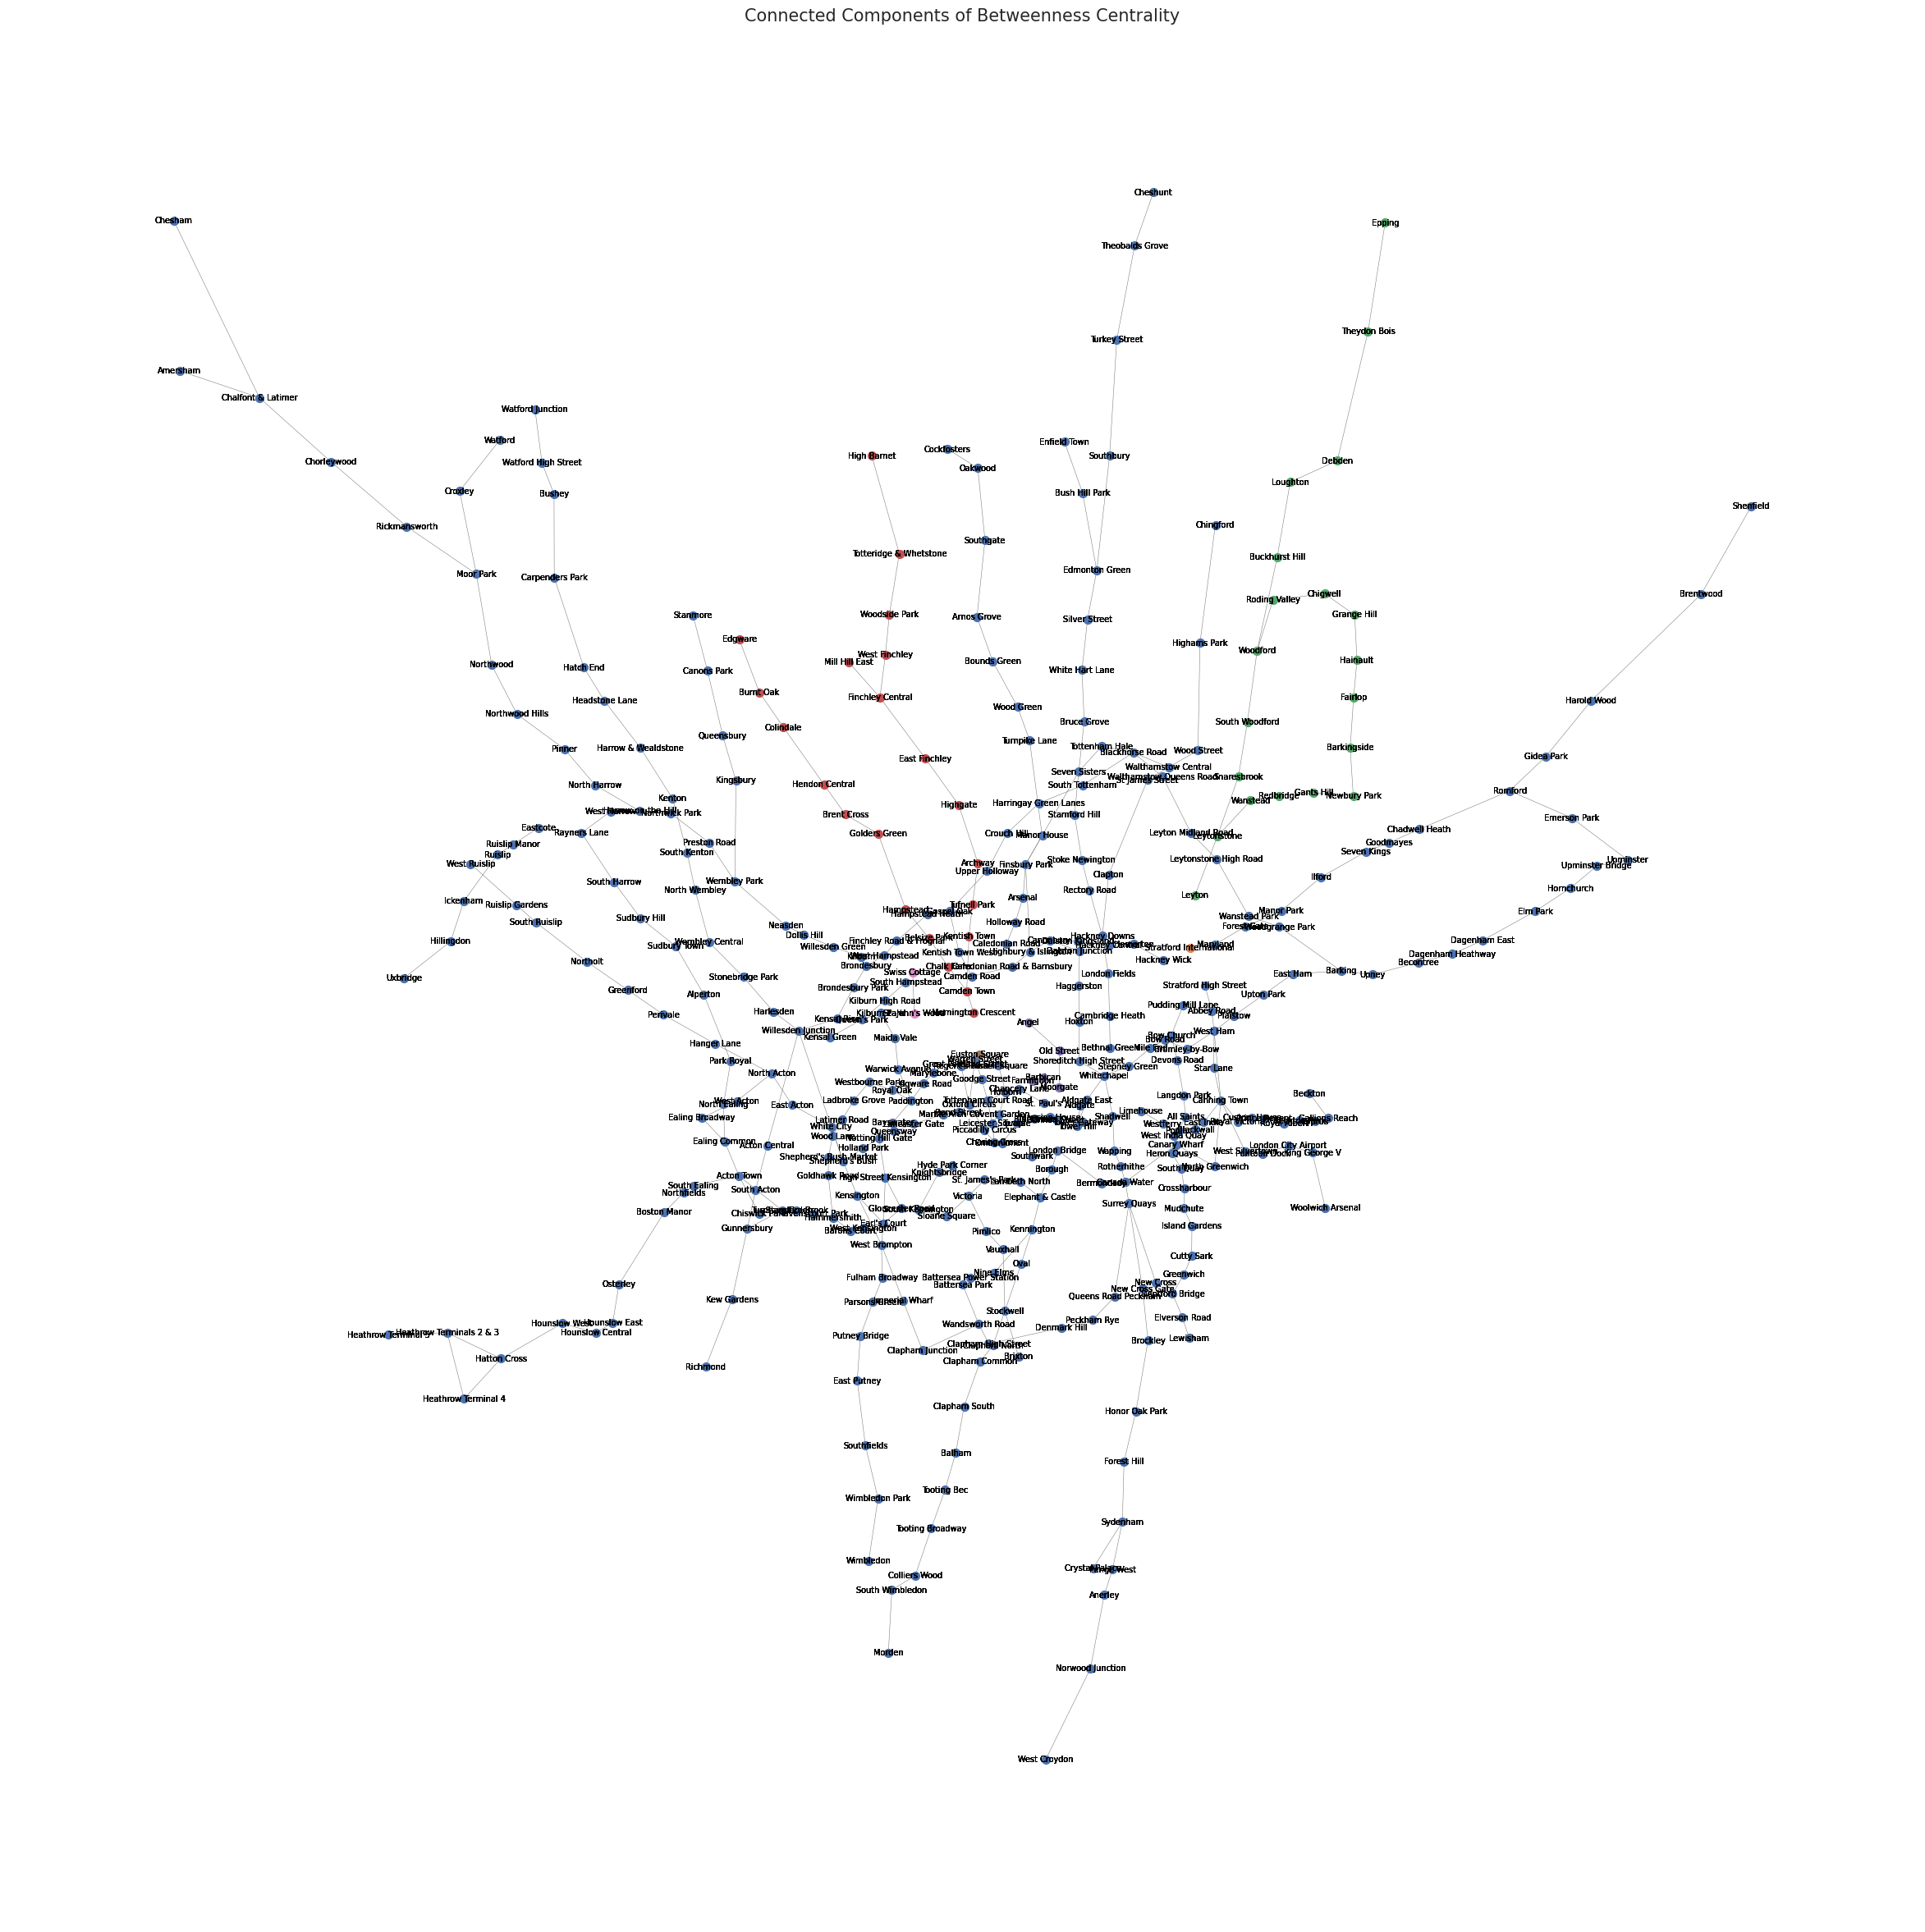

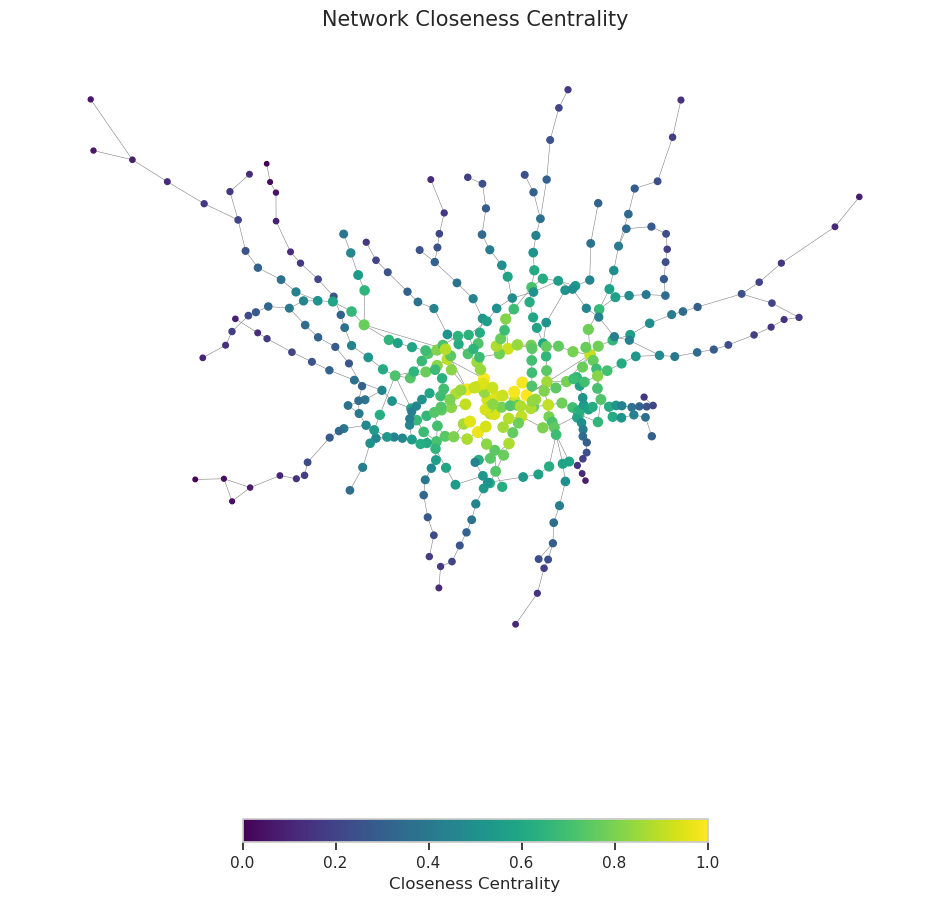

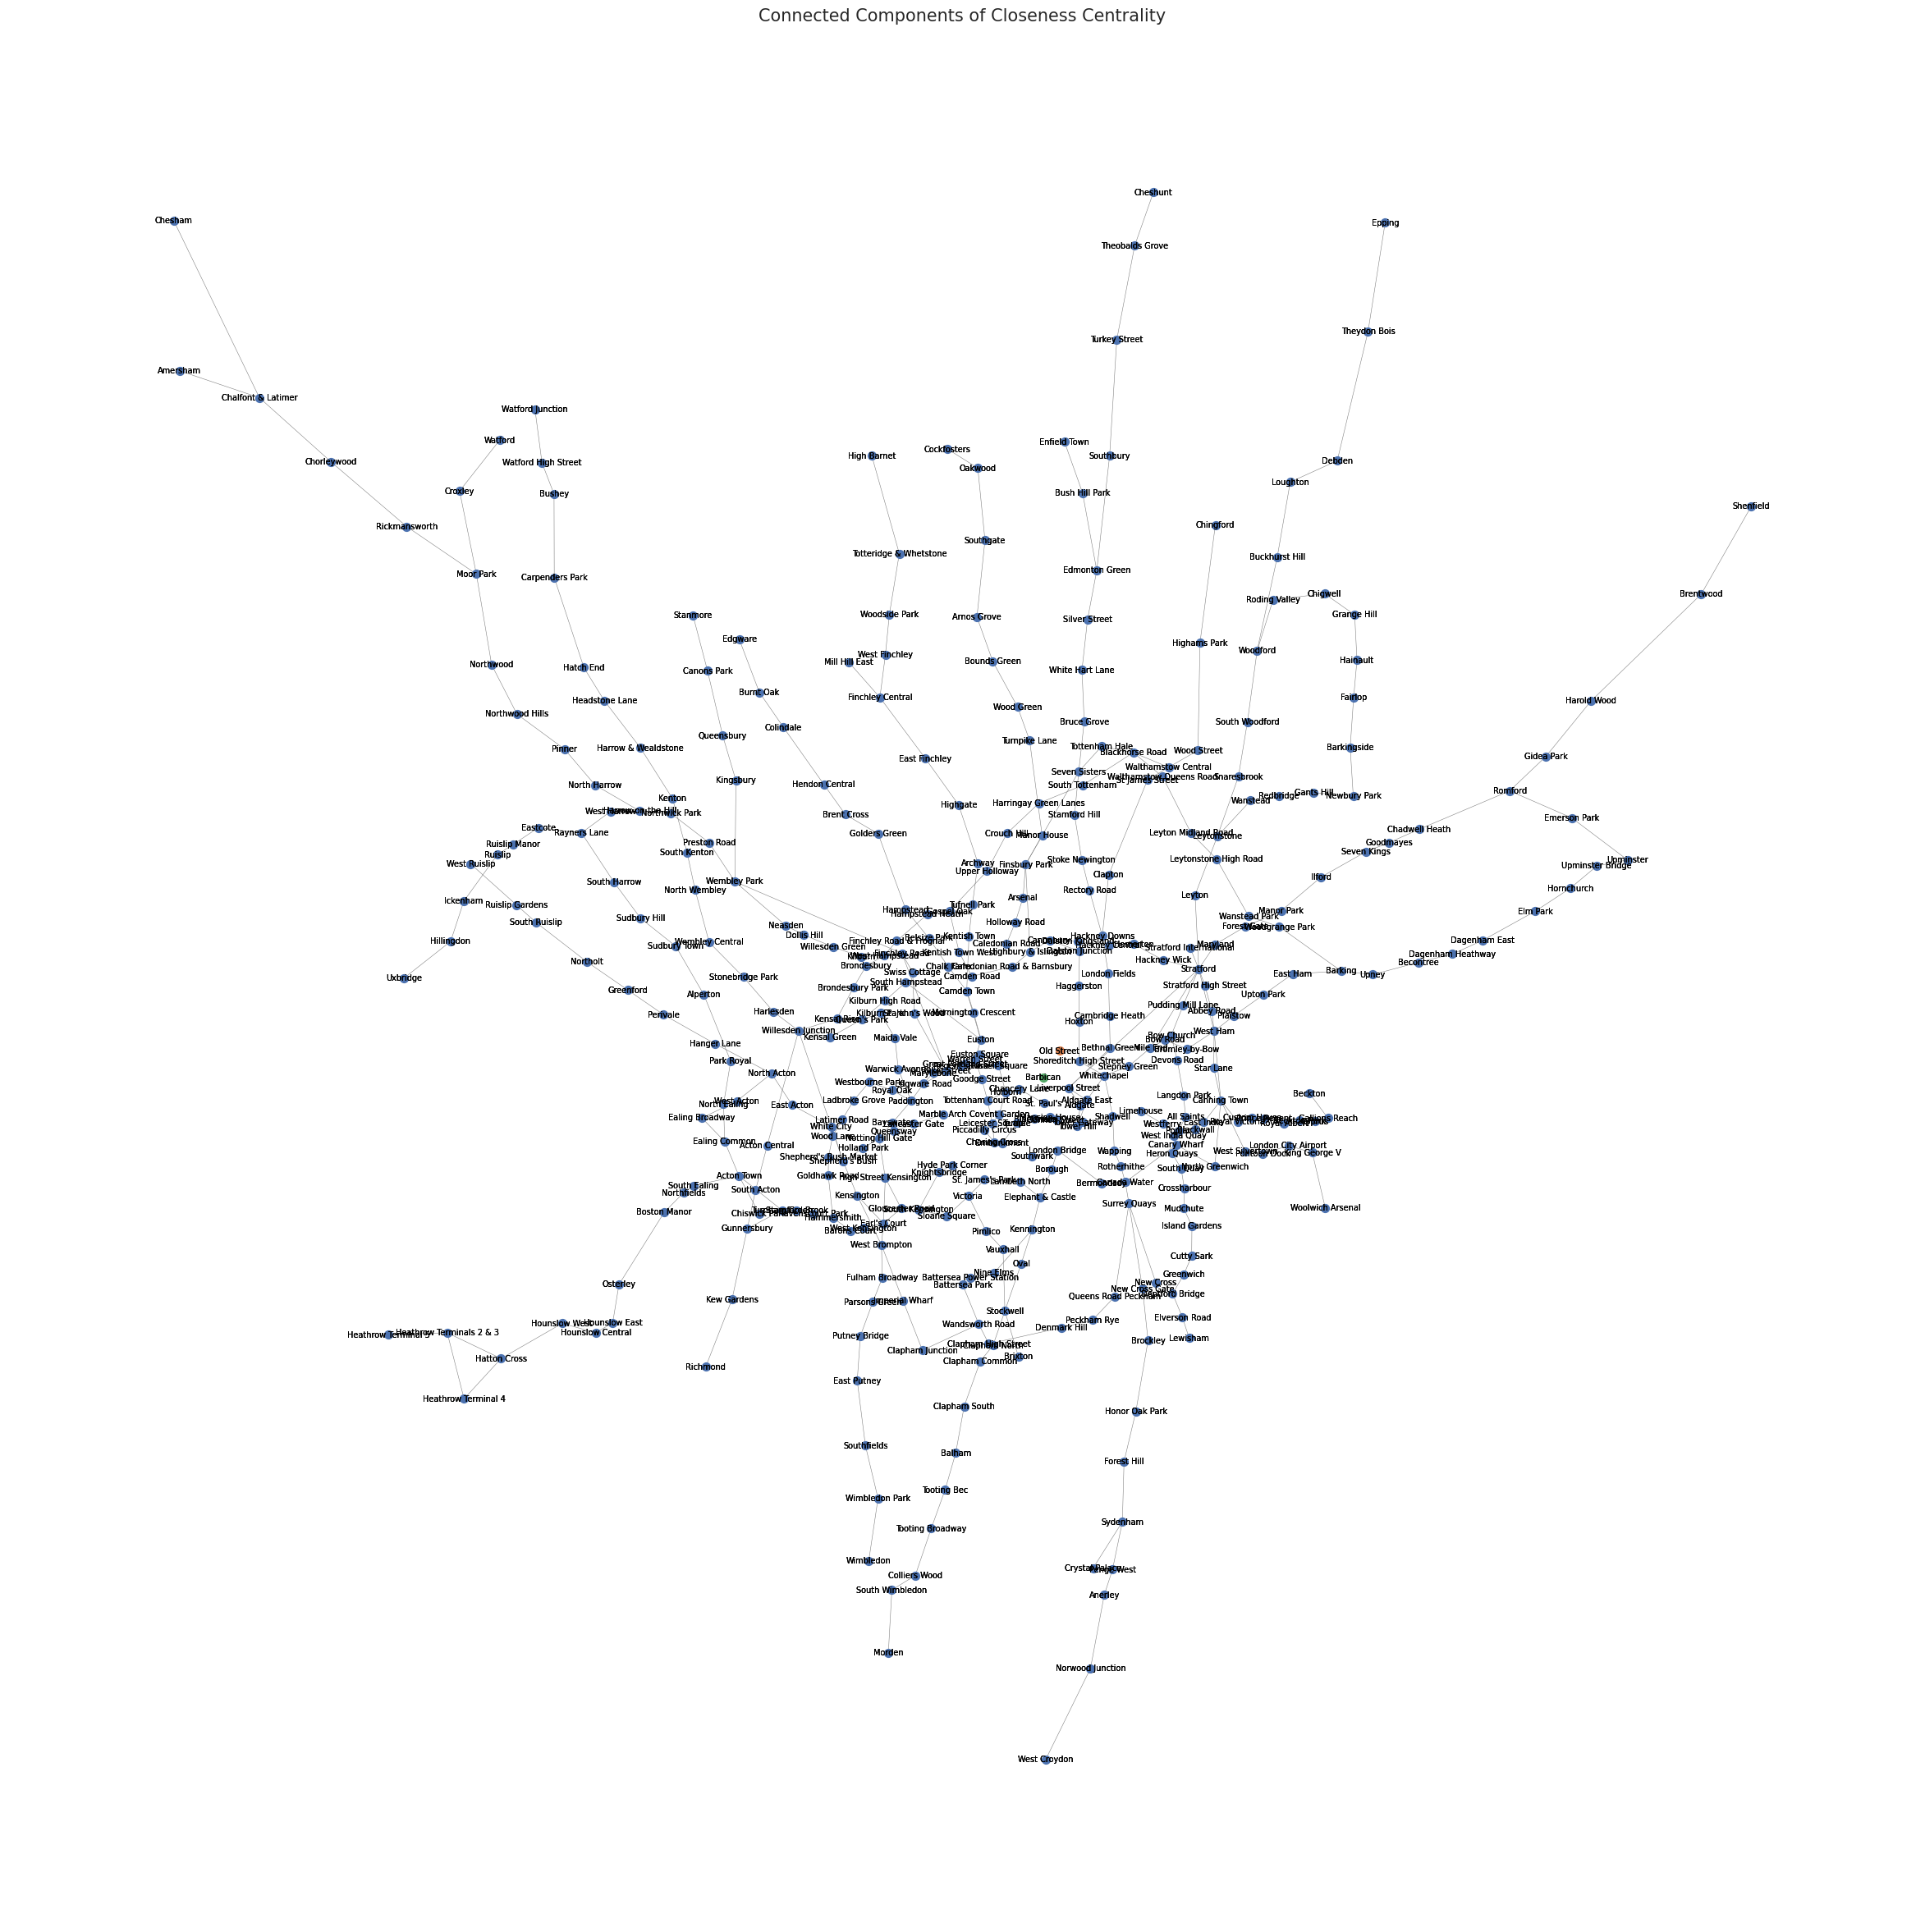

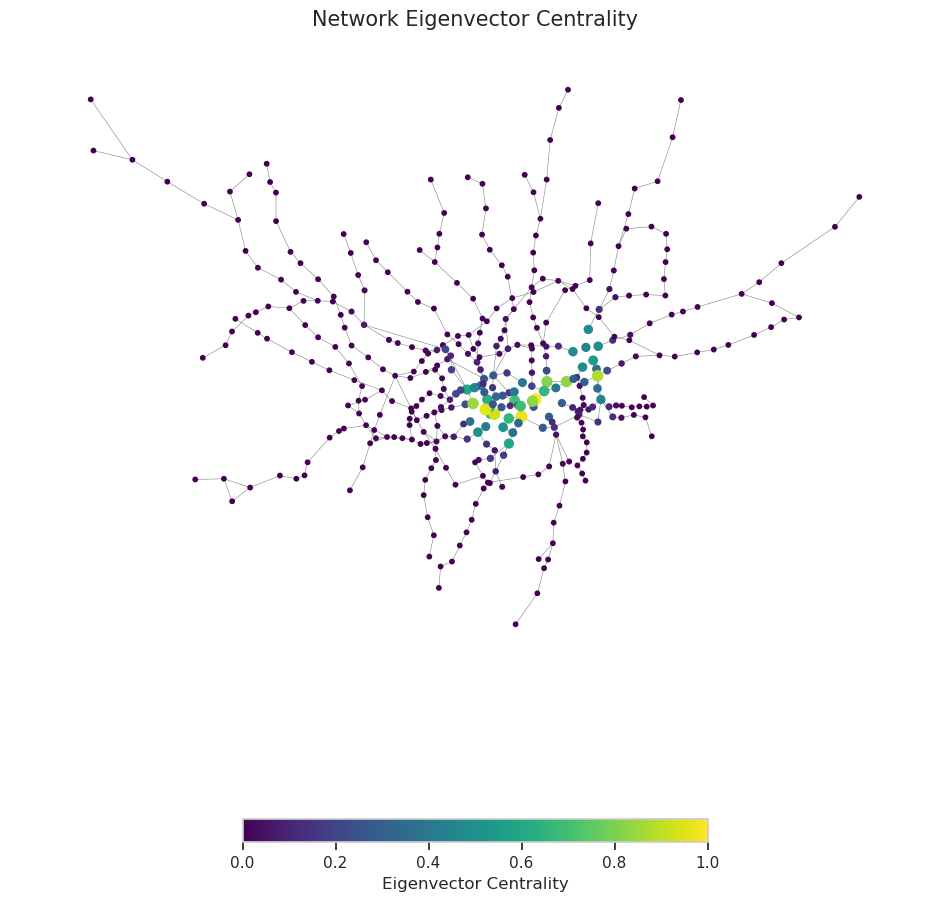

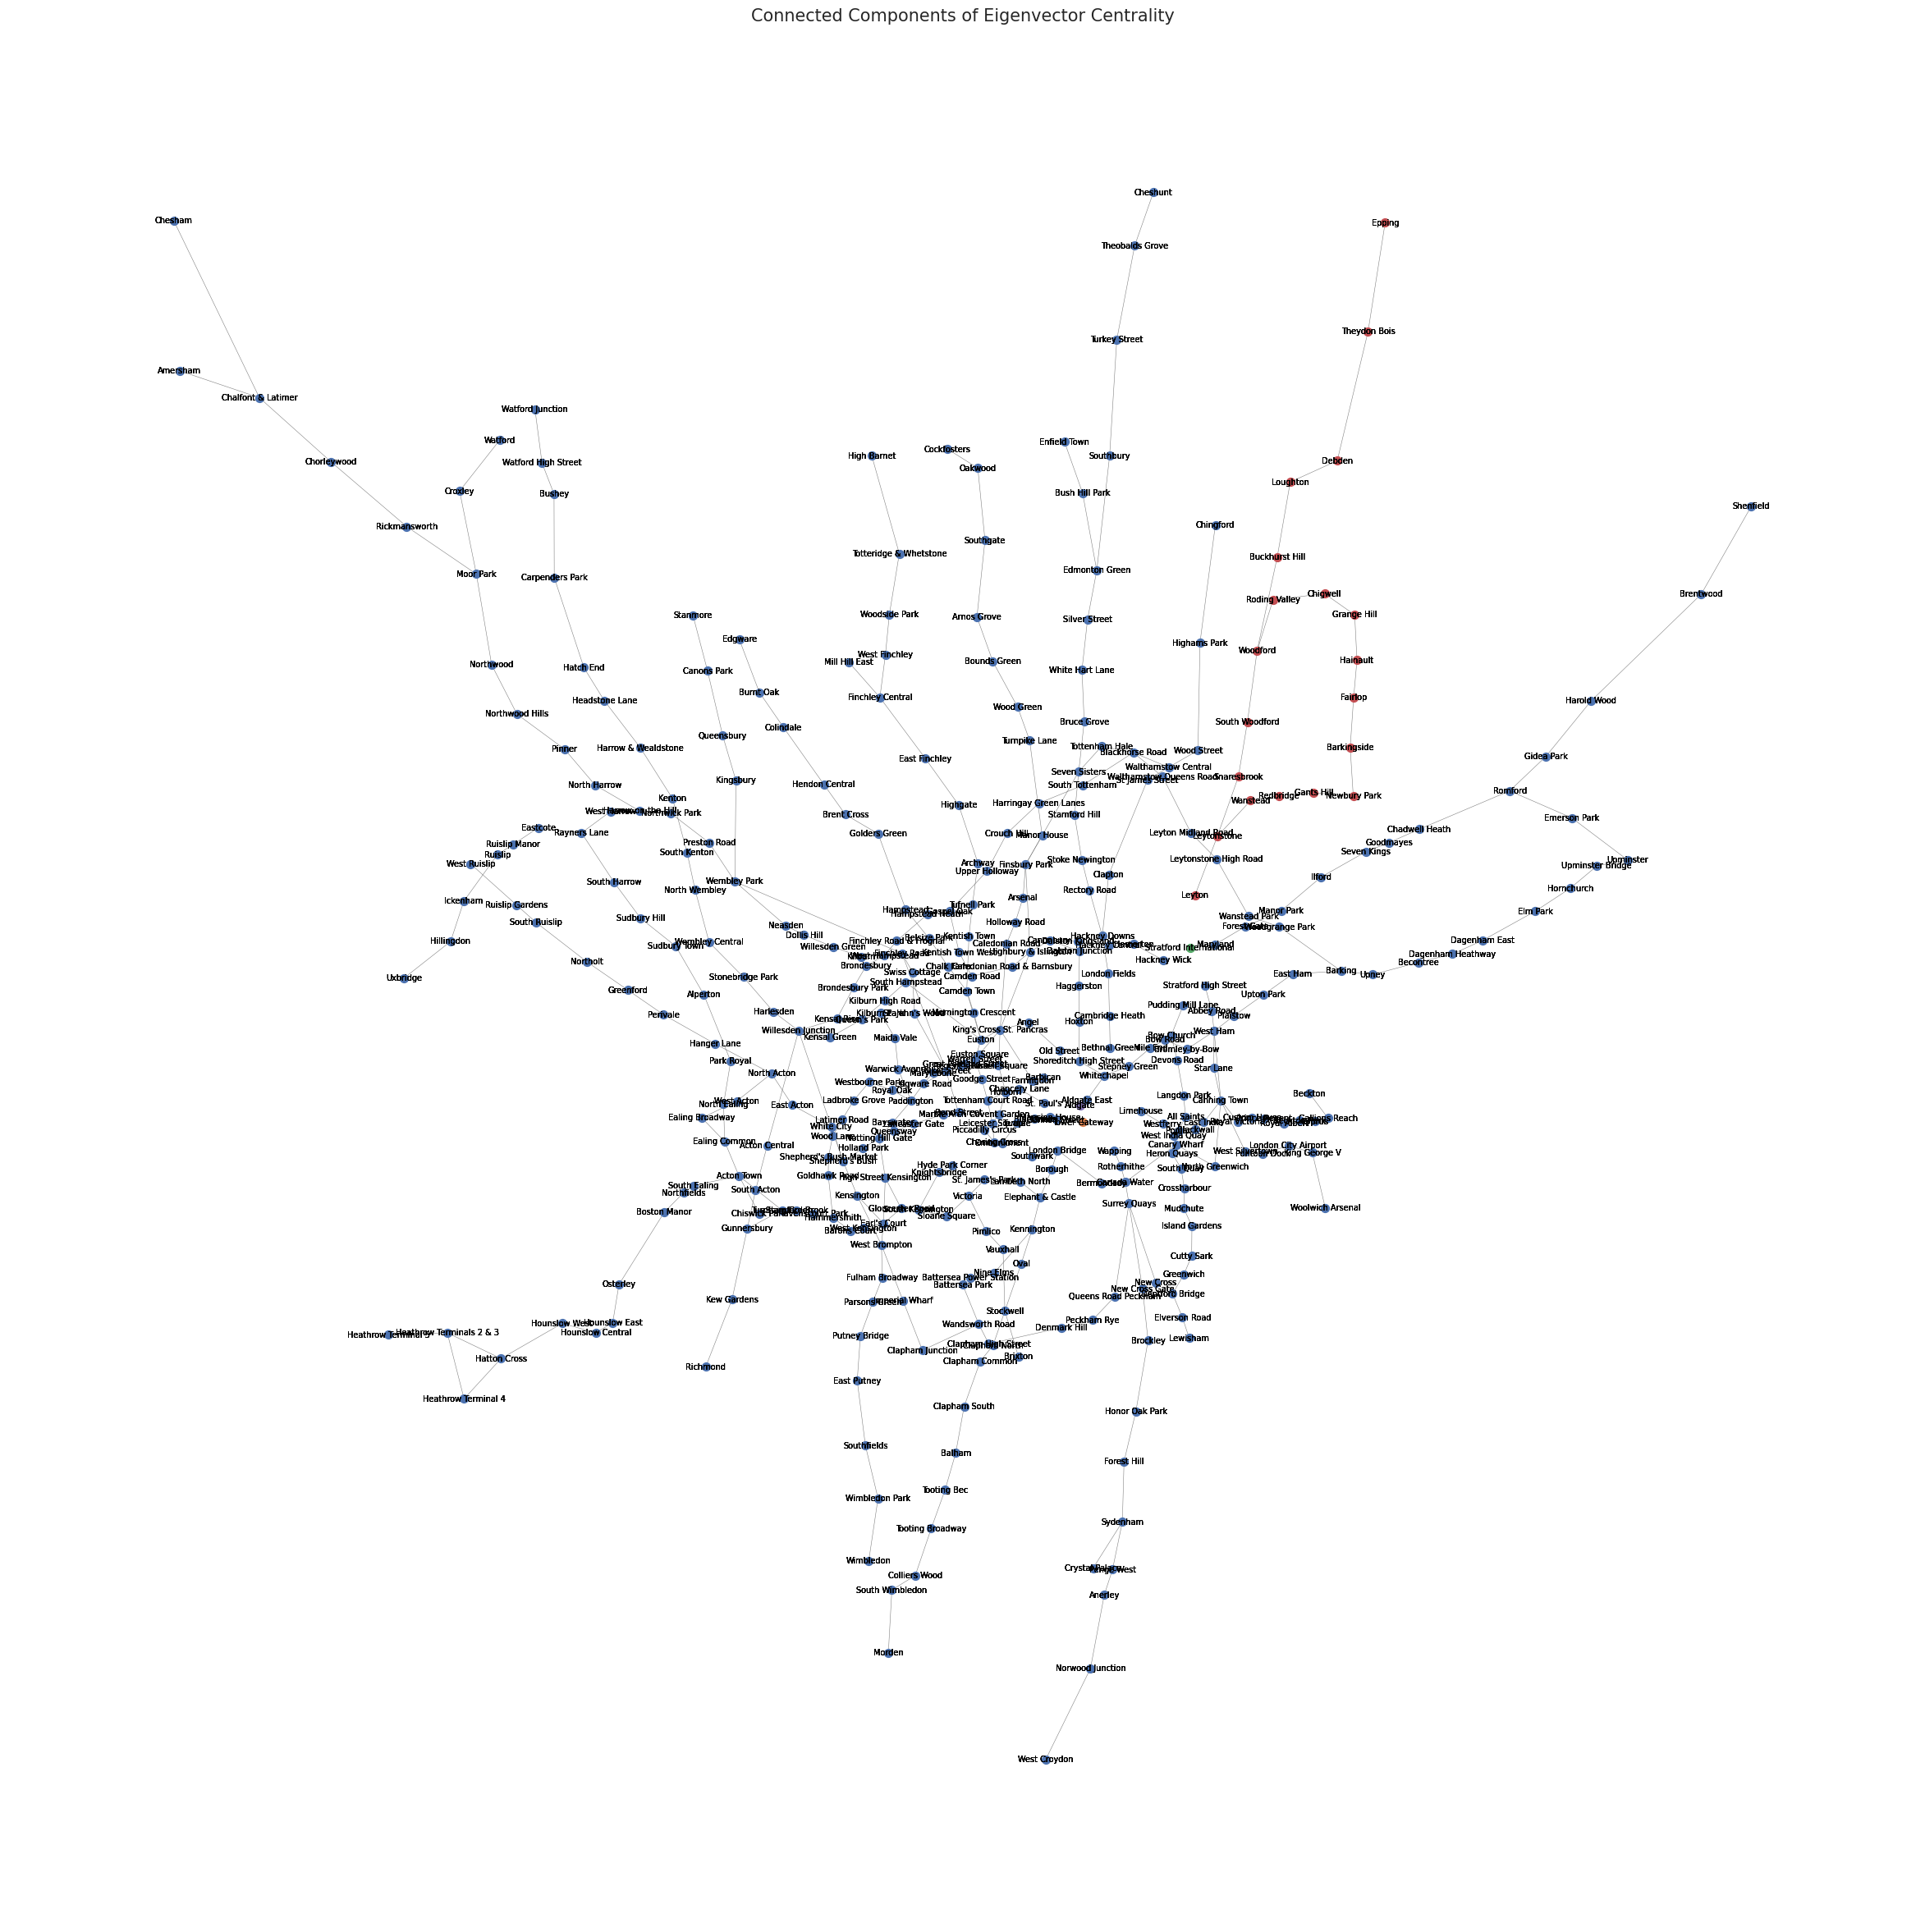

In [50]:
# For each centrality measure.
for measure in measure_names:
    G_temp = G.copy()
    efficiency = []
    nlcc = []
    
    # Get all nodes and their centrality measures.
    centrality_values = {node: data[measure] for node, data in G_temp.nodes(data=True)}
    
    # Sort nodes by centrality measure from largest to smallest.
    sorted_nodes = sorted(centrality_values, key=centrality_values.get, reverse=True)
    
    # Delete the first 10 nodes after sorting and calculate the global efficiency and NLCC.
    for i in range(min(10, len(sorted_nodes))):
        node_to_remove = sorted_nodes[i]
        G_temp.remove_node(node_to_remove)
        
        # Calculate global efficiency and NLCC after each node is deleted.
        efficiency.append(nx.global_efficiency(G_temp))
        nlcc.append(calculate_nlcc(G_temp))
        
    # Add results to results_a.
    results_a.append({
        'measure': measure,
        'efficiency': efficiency,
        'nlcc': nlcc   
    })

    plot_result_network(G_temp, measure)
    plot_result_network_cc(G_temp, measure)

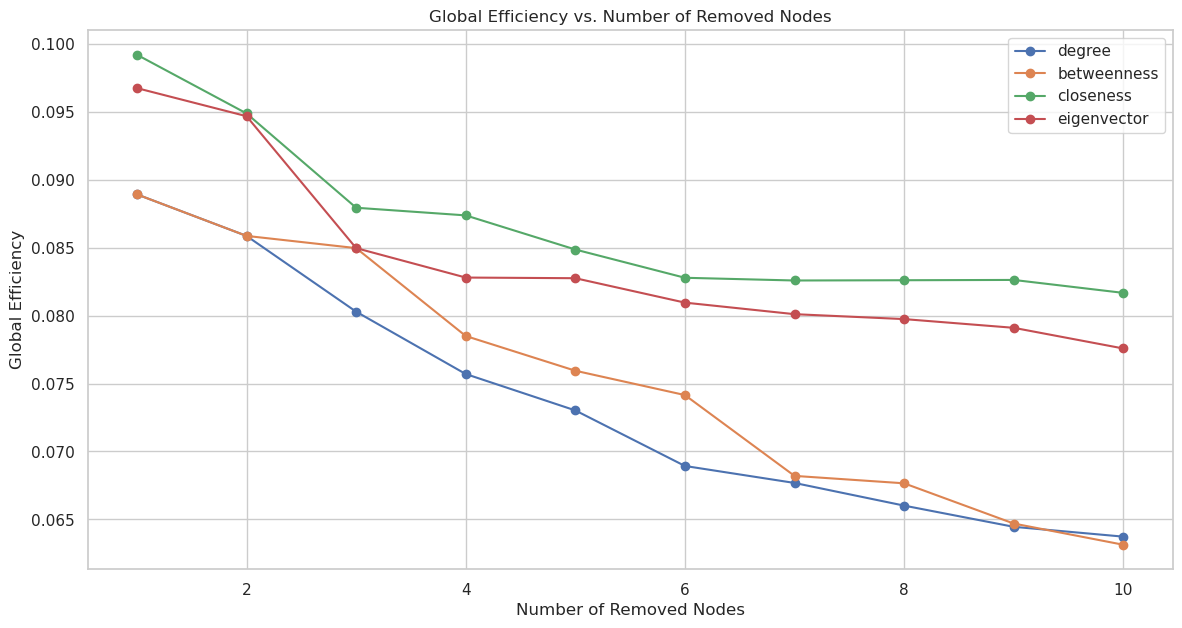

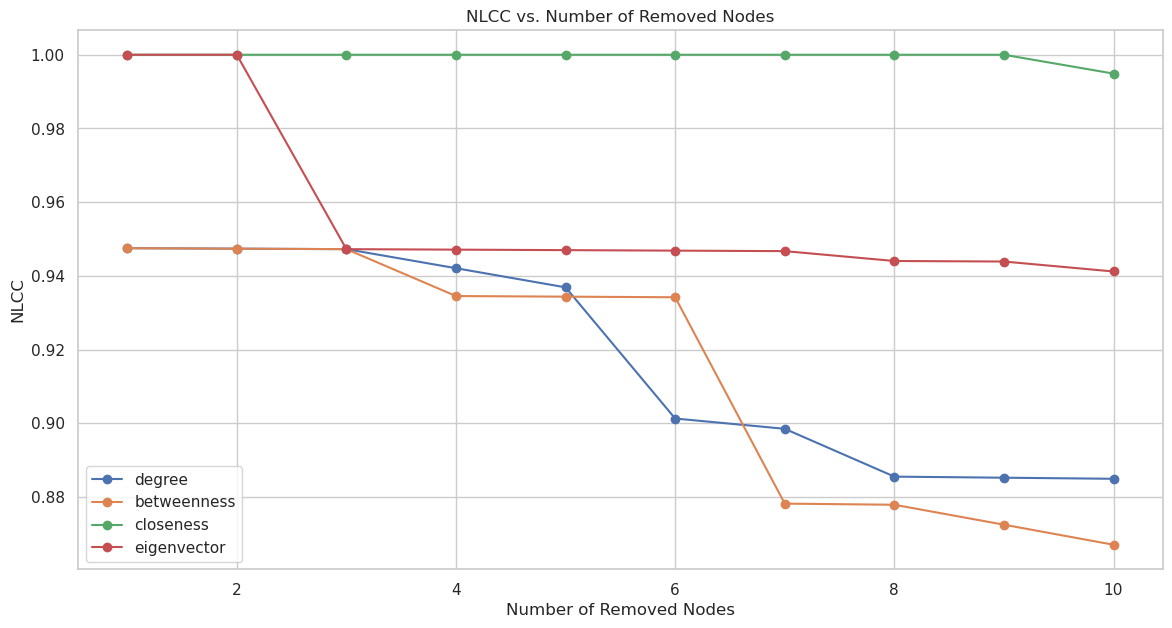

In [51]:
# Global efficiency.
plt.figure(figsize=(14, 7))

# For each centrality measure, plot the global efficiency curve.
for entry in results_a:
    plt.plot(range(1, 11), entry['efficiency'], '-o', label=entry['measure'])

plt.title('Global Efficiency vs. Number of Removed Nodes')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Global Efficiency')
plt.legend()
plt.show()

# NLCC
plt.figure(figsize=(14, 7))

# For each centrality measure, plot the NLCC curve.
for entry in results_a:
    plt.plot(range(1, 11), entry['nlcc'], '-o', label=entry['measure'])

plt.title('NLCC vs. Number of Removed Nodes')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('NLCC')
plt.legend()
plt.show()

#### B) Sequential removal

In [58]:
# Add NetworkX's centrality calculation function to the dictionary.
centrality_functions = {
    'degree': nx.degree_centrality,
    'betweenness': nx.betweenness_centrality,
    'closeness': nx.closeness_centrality,
    'eigenvector': lambda G: nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)
}

# Data structure to store results.
results_b = []

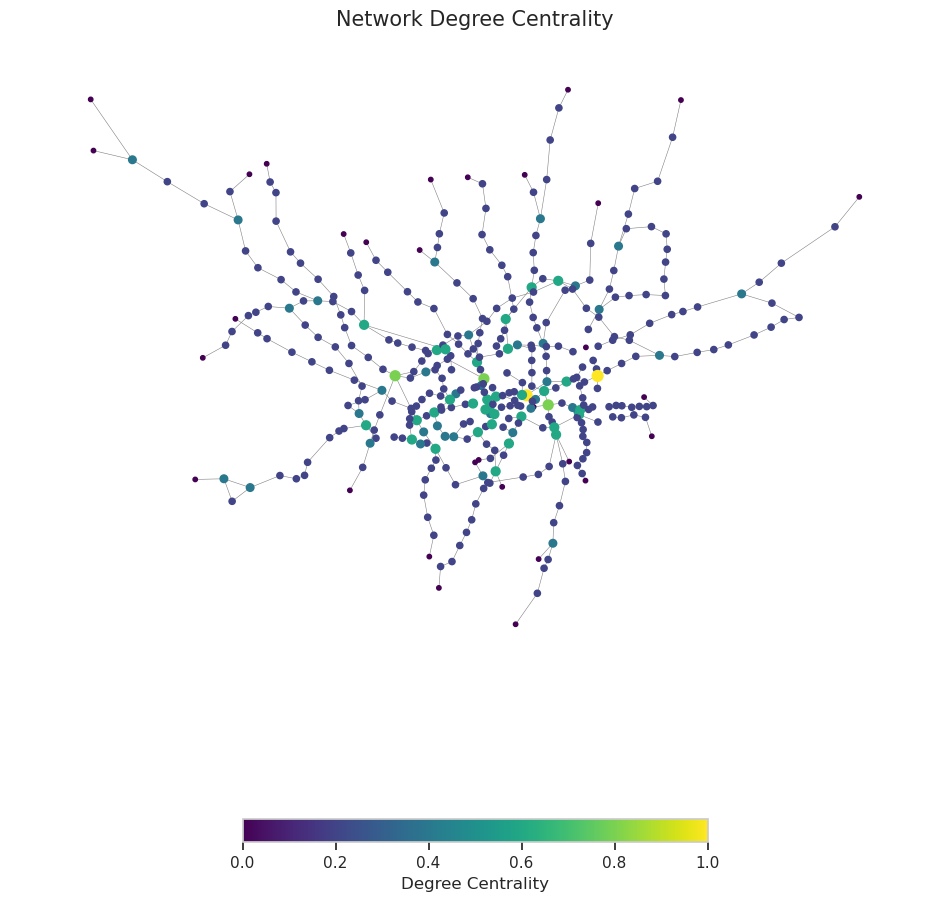

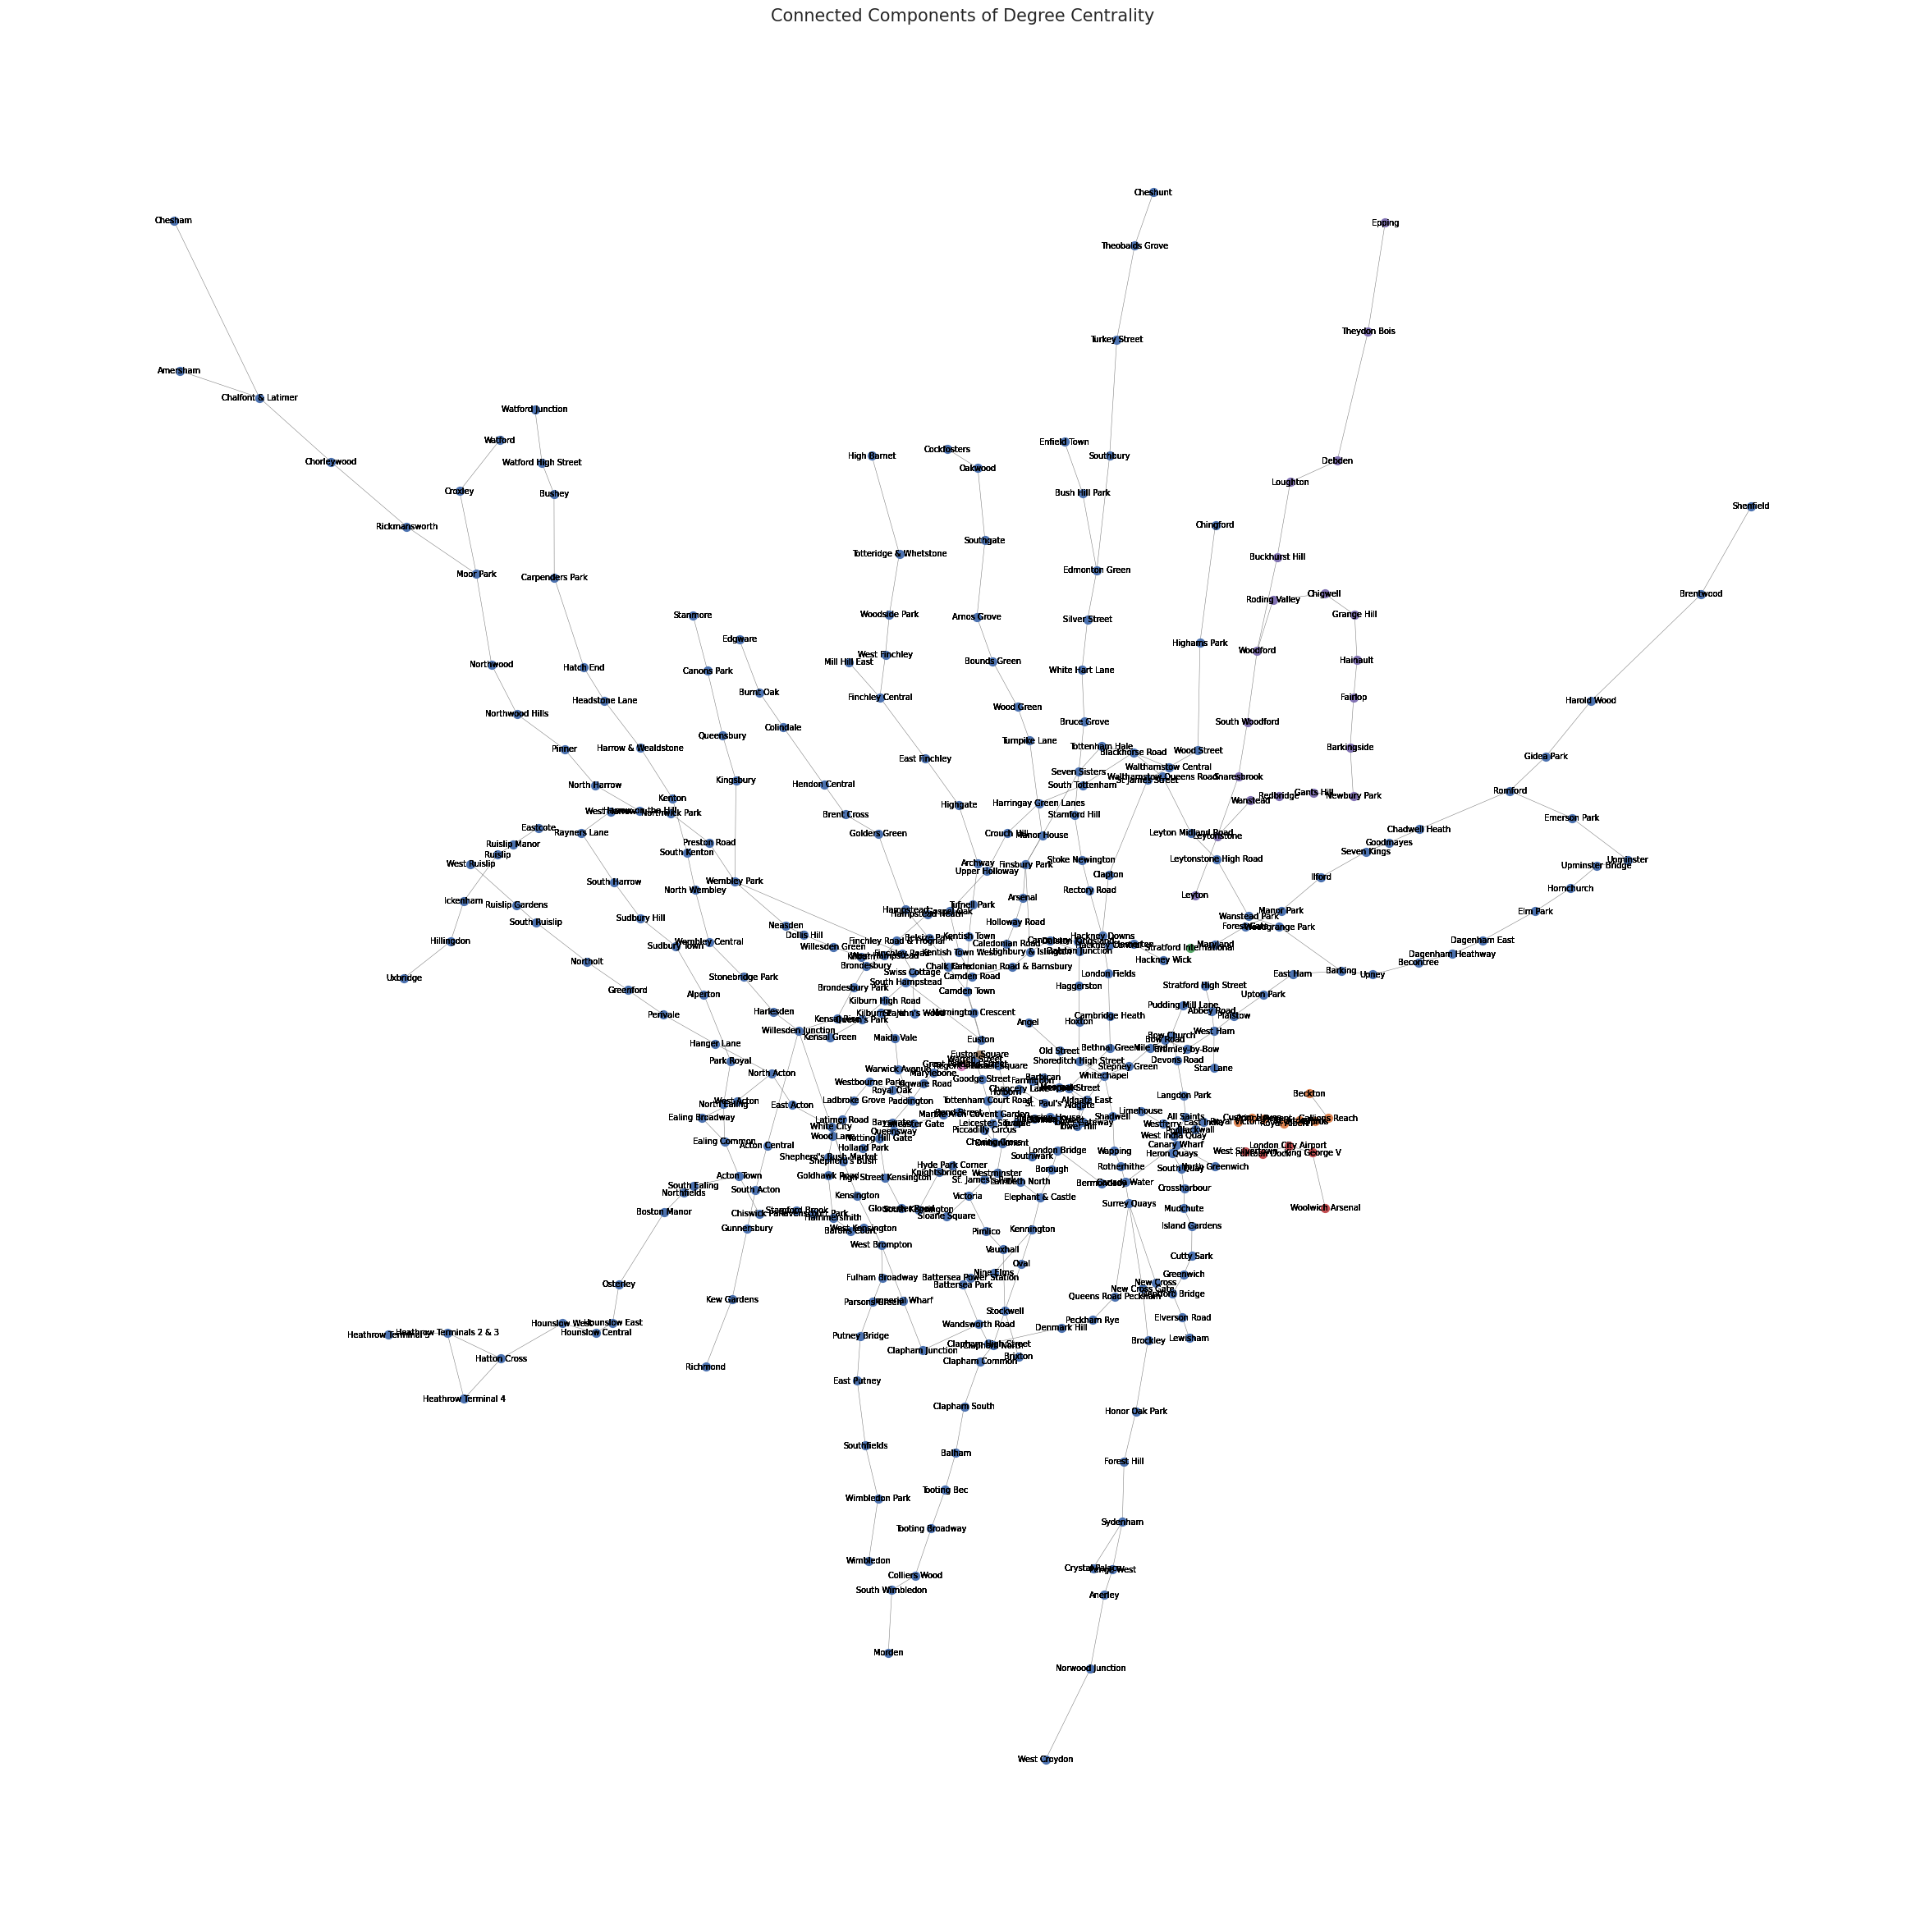

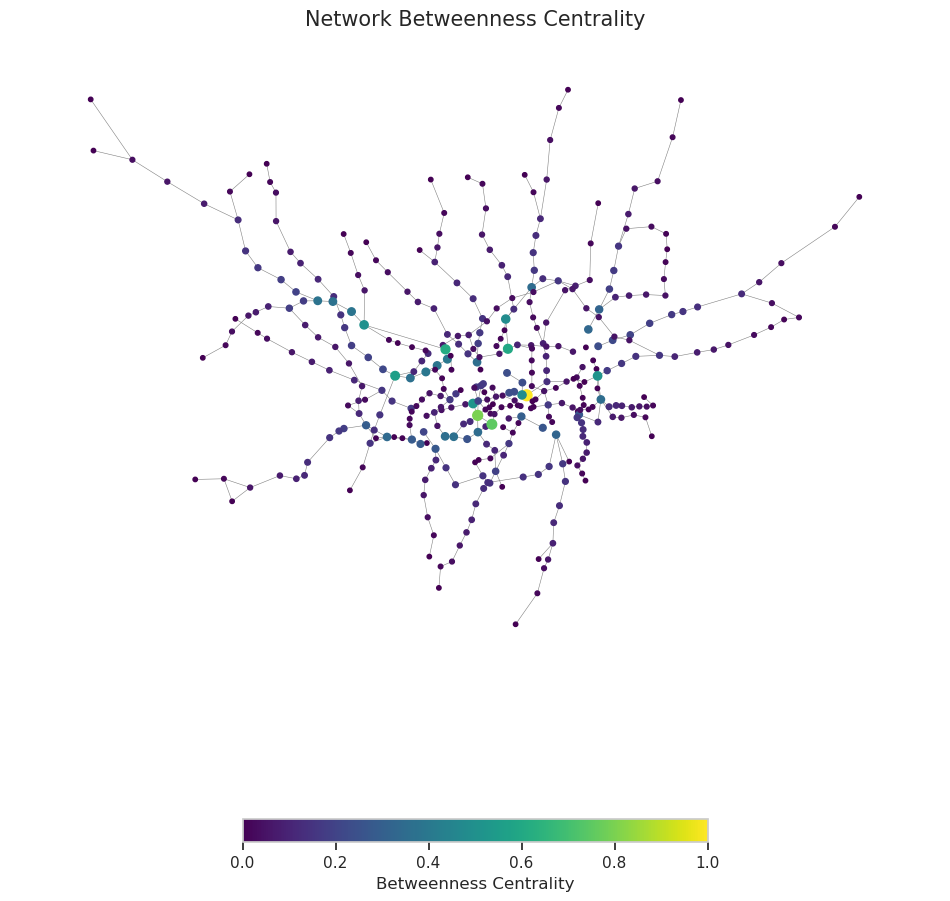

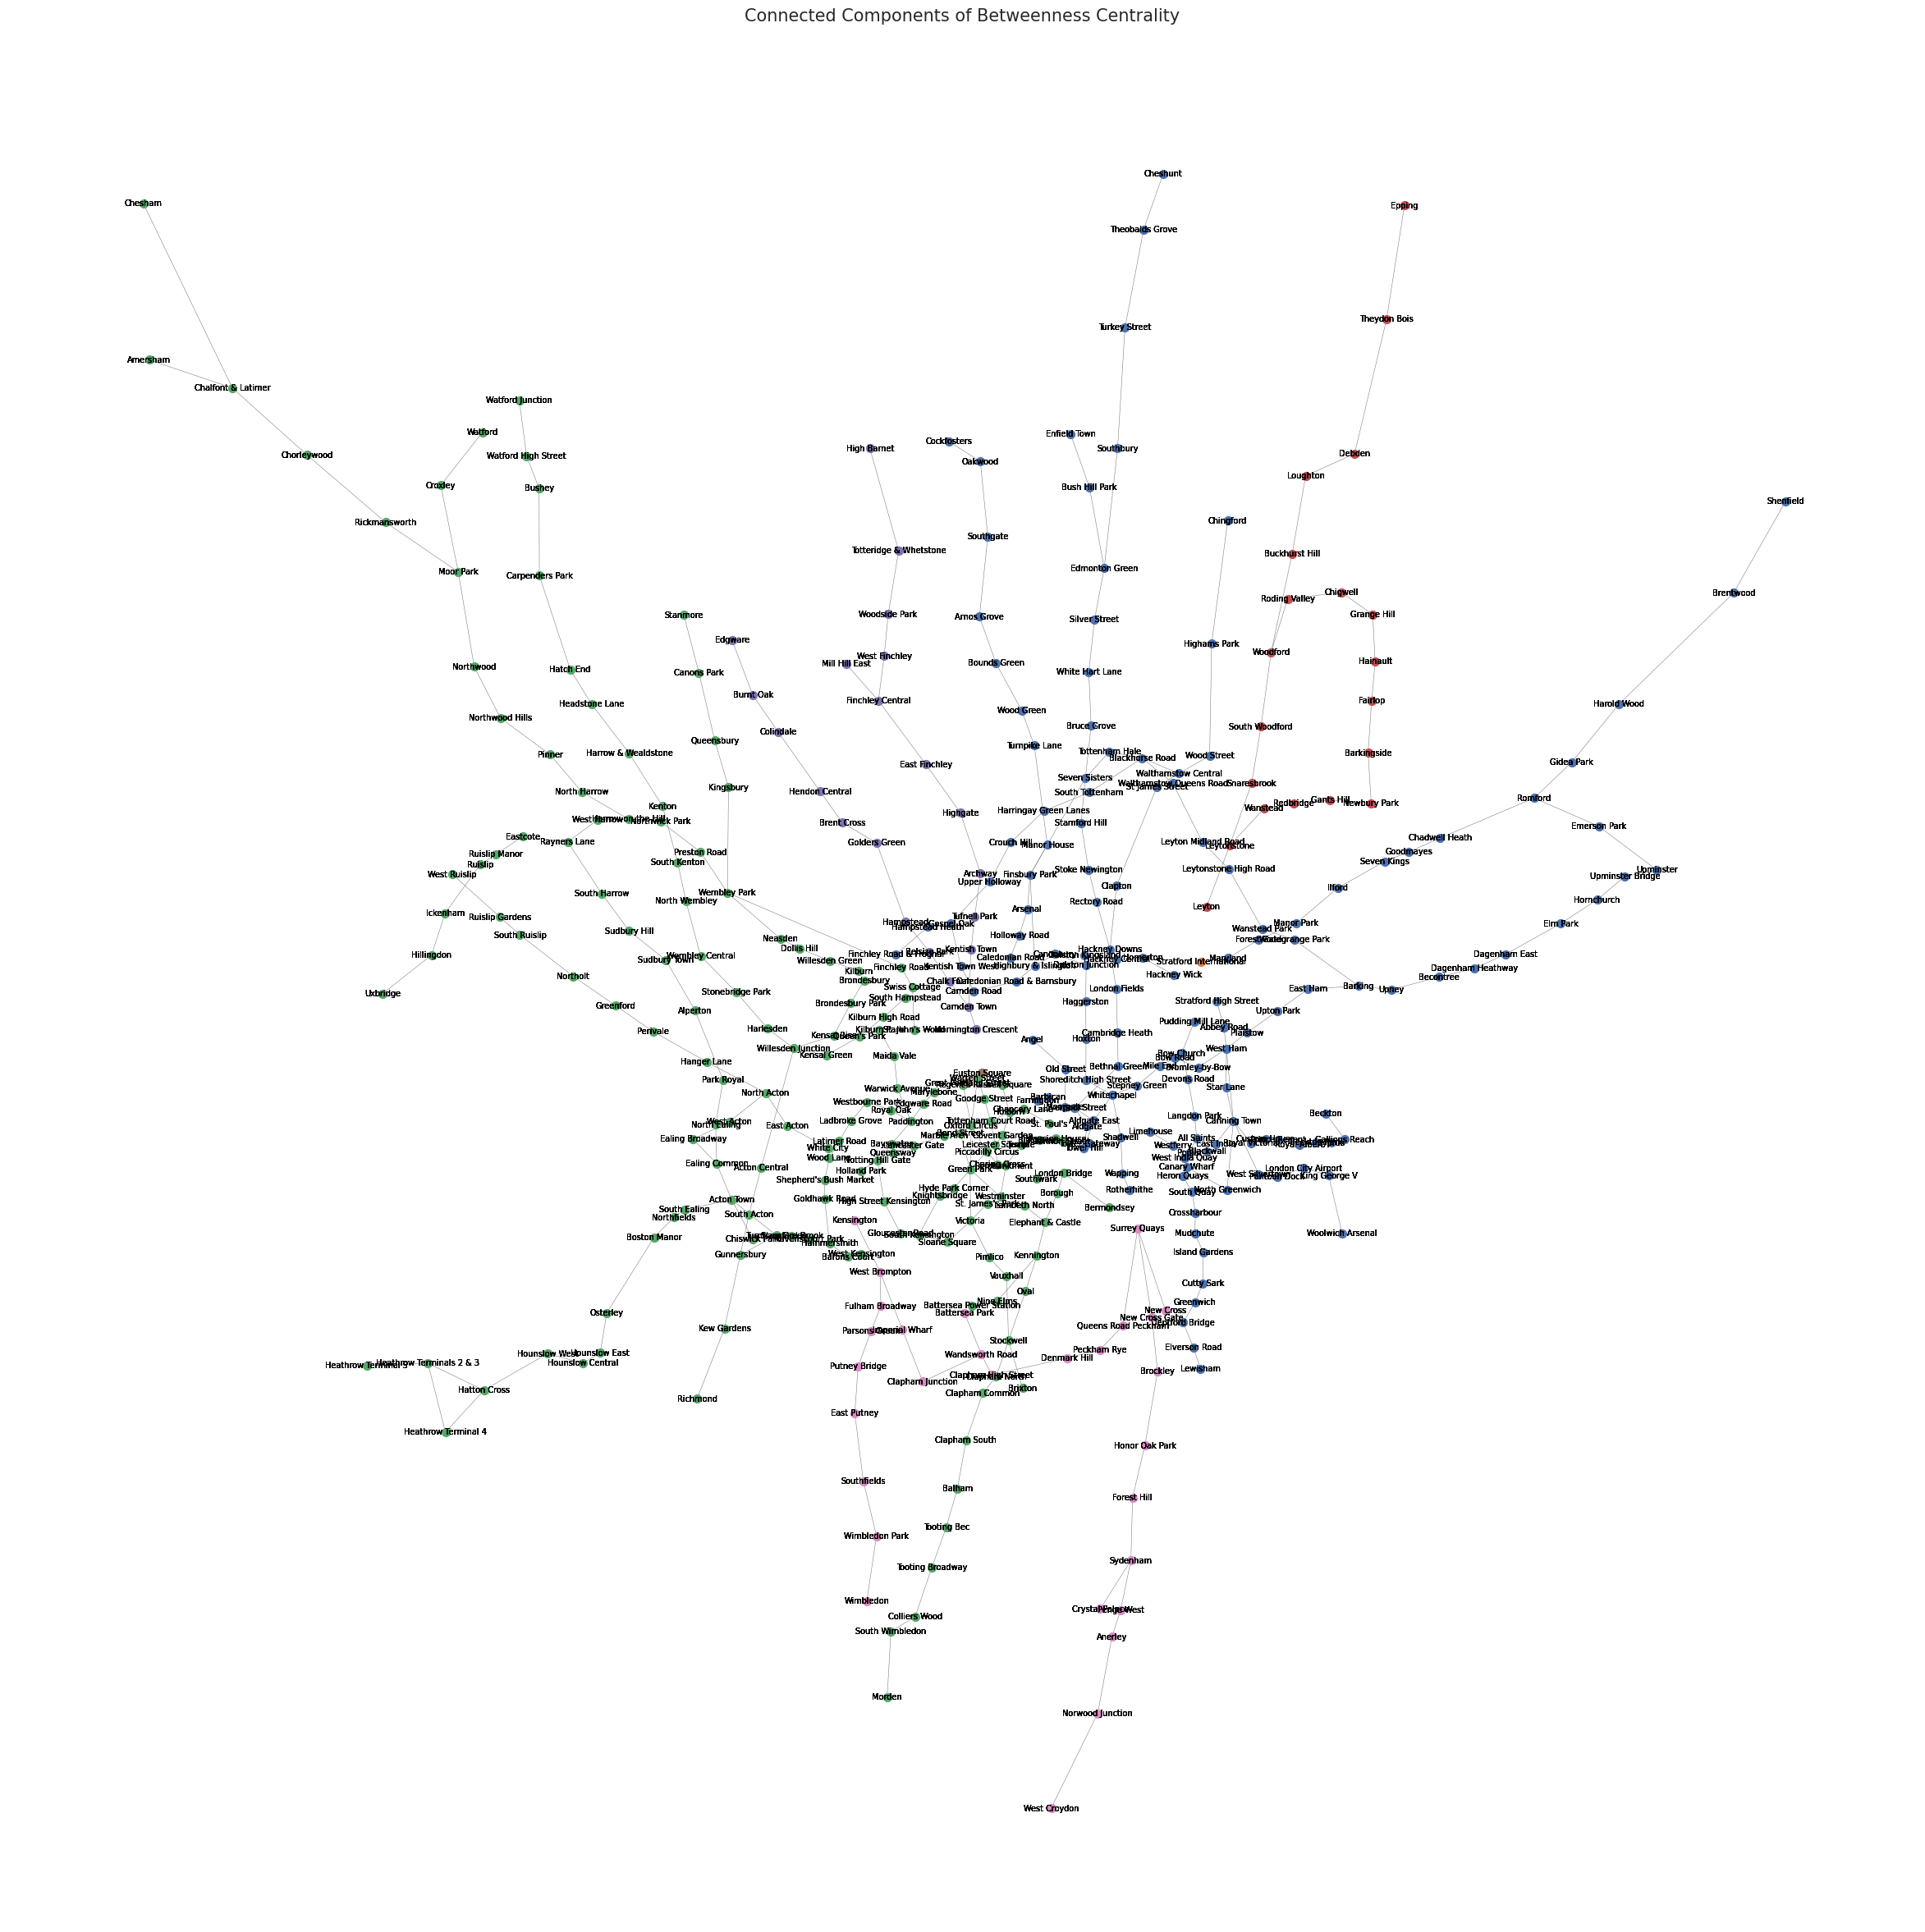

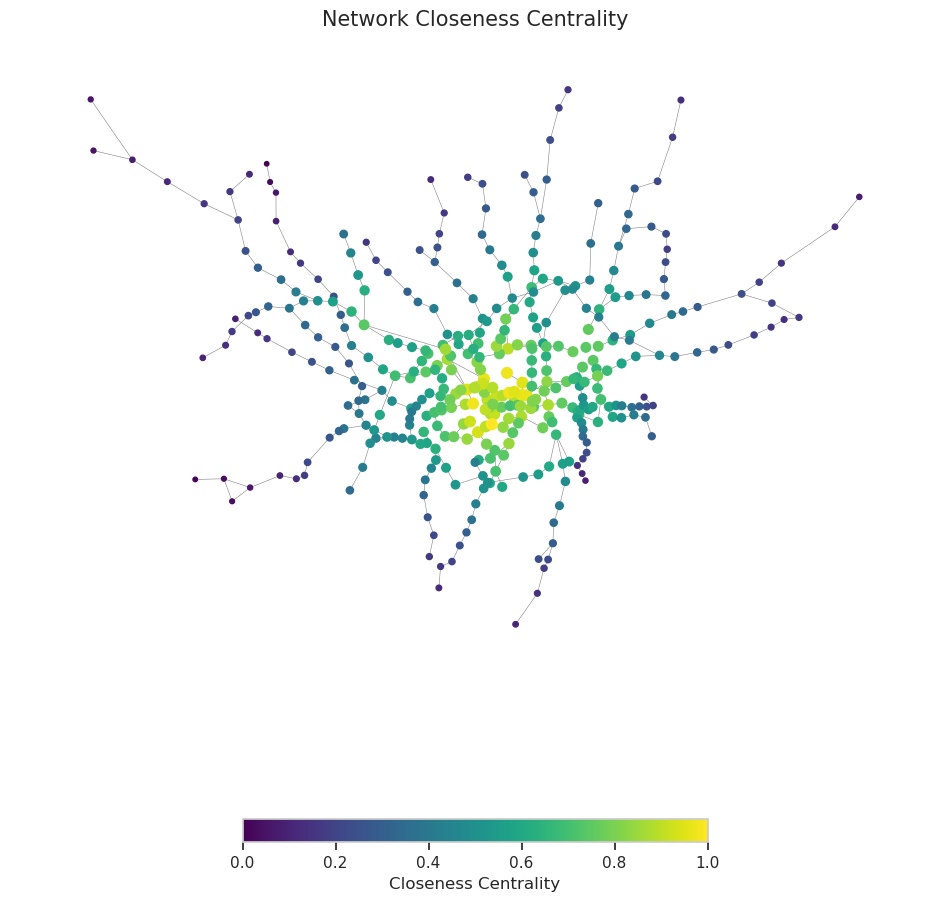

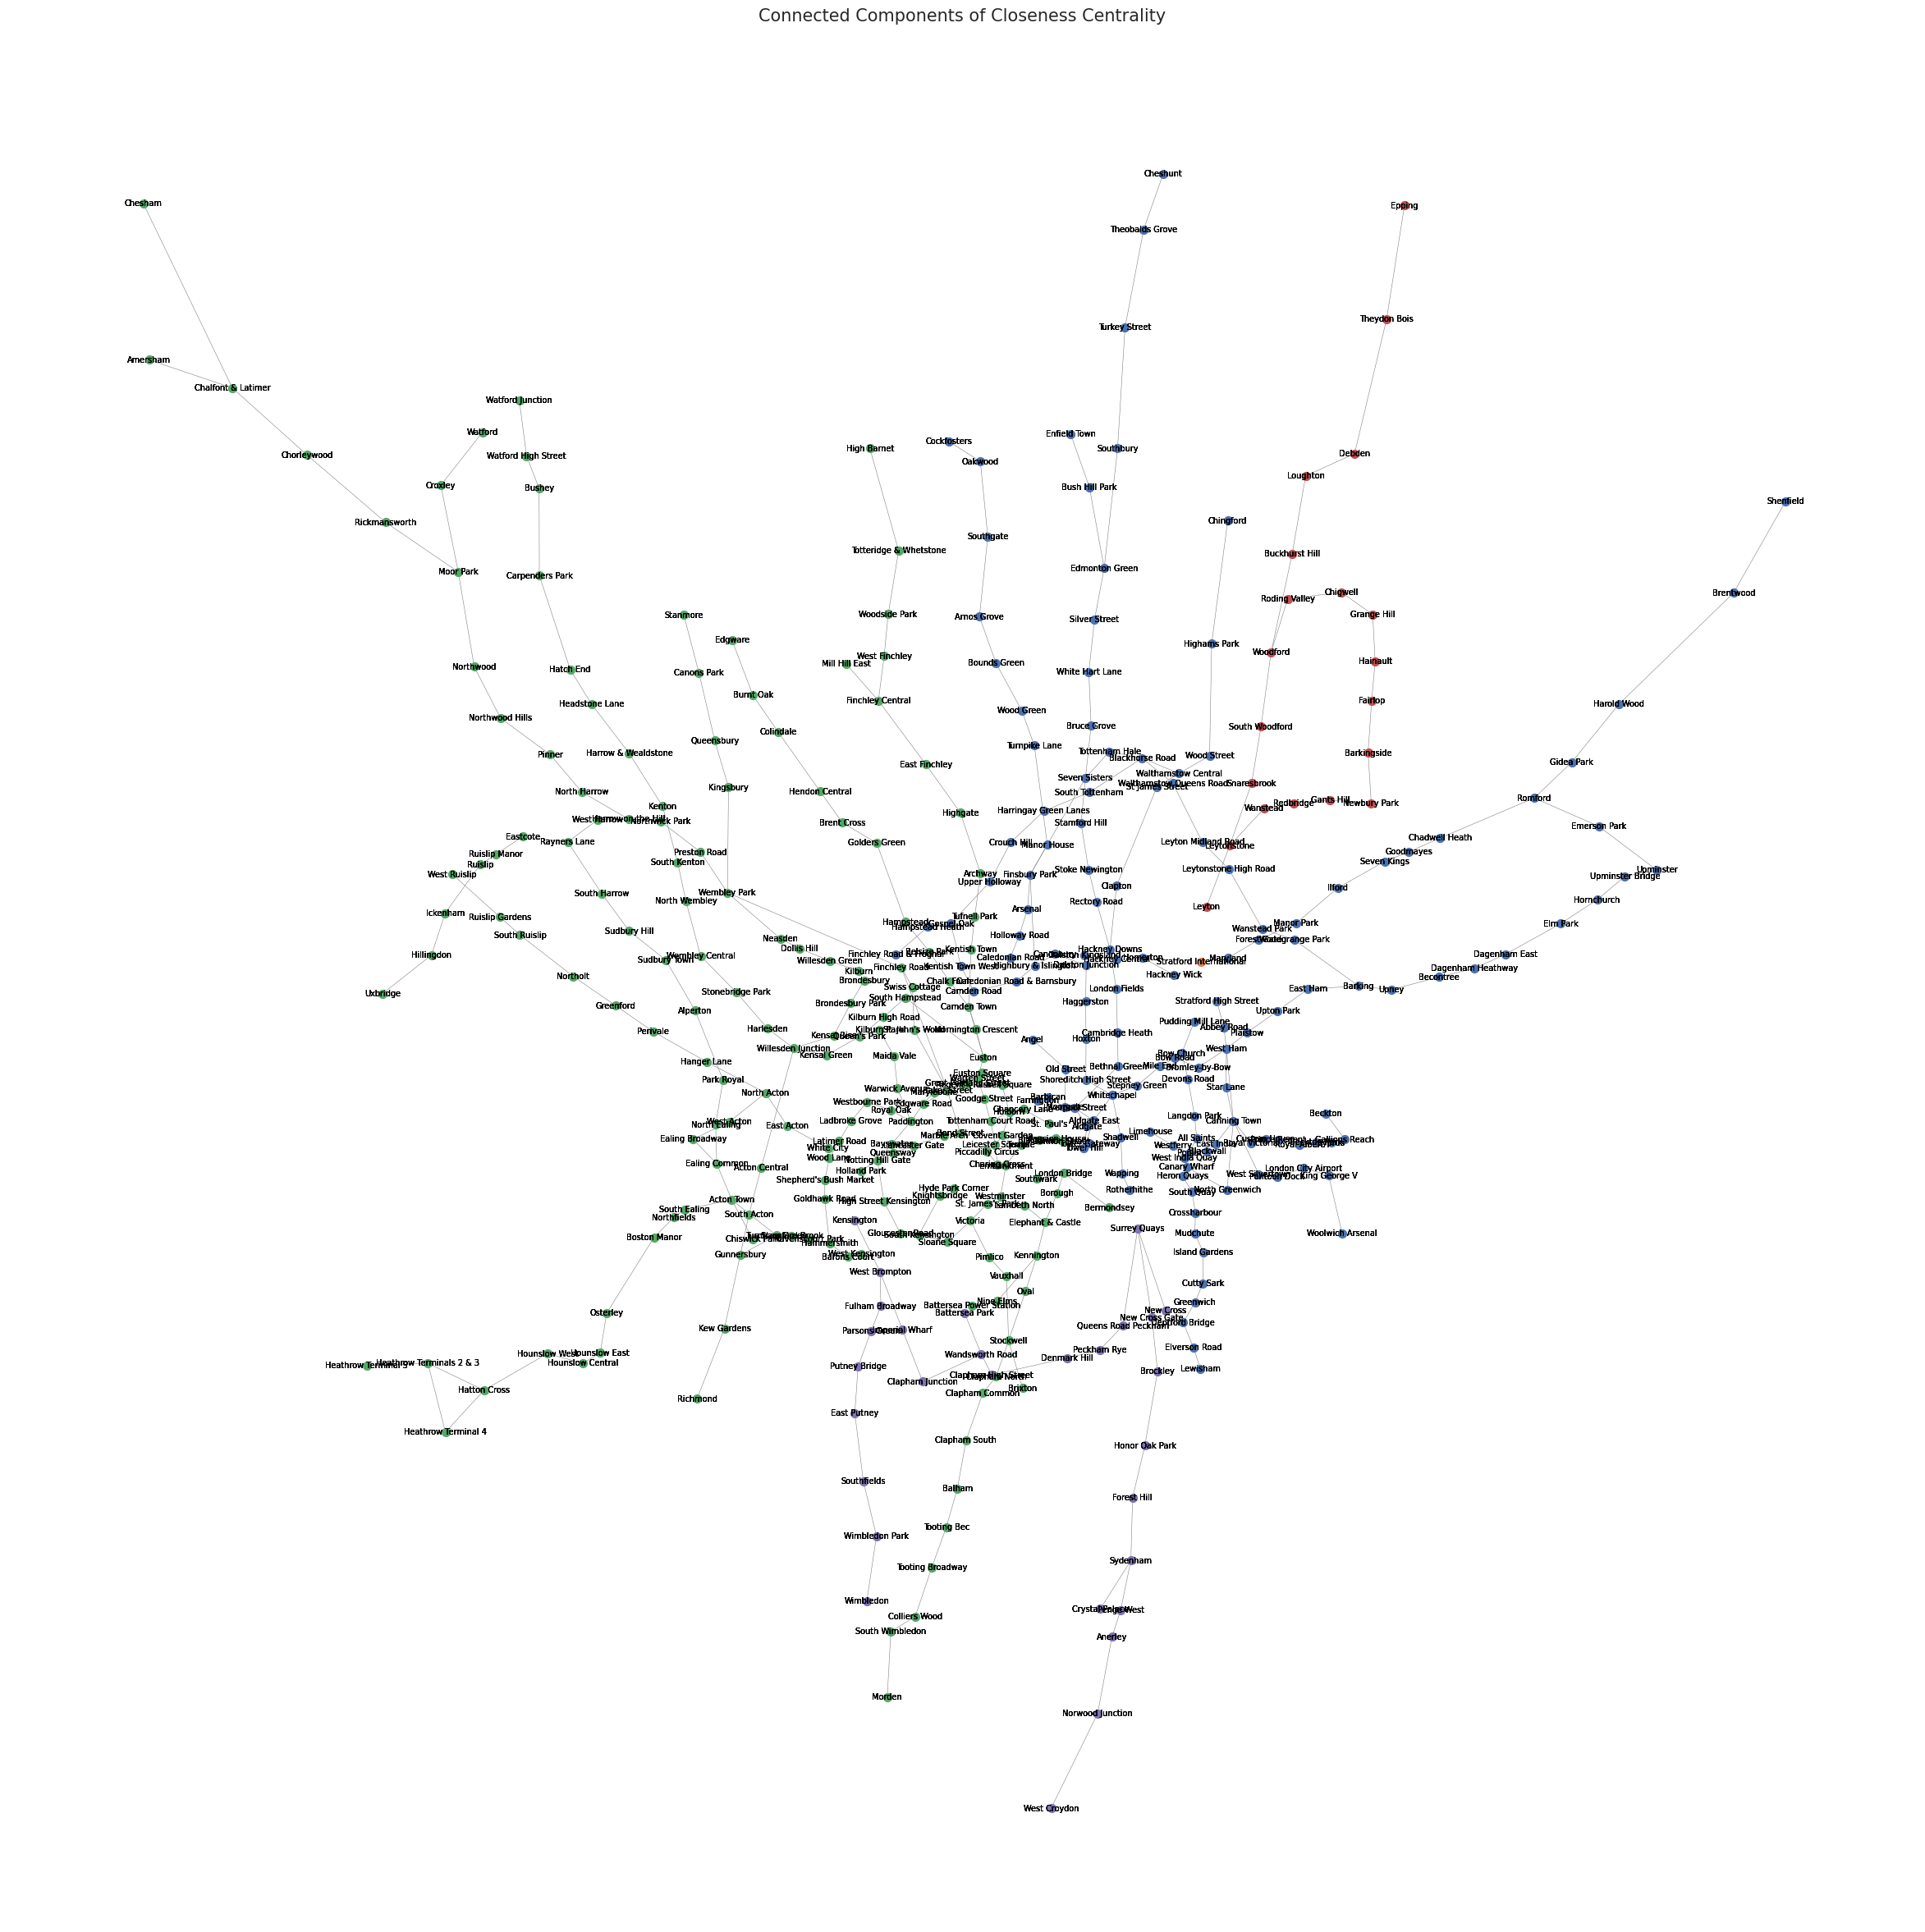

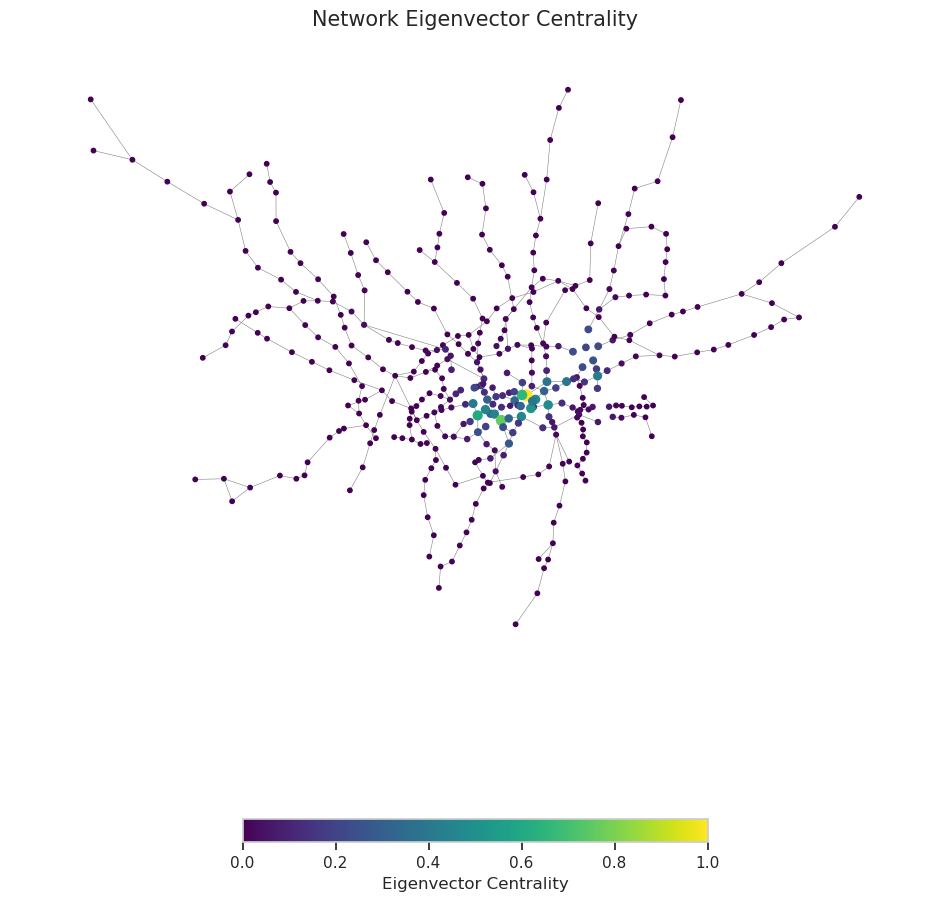

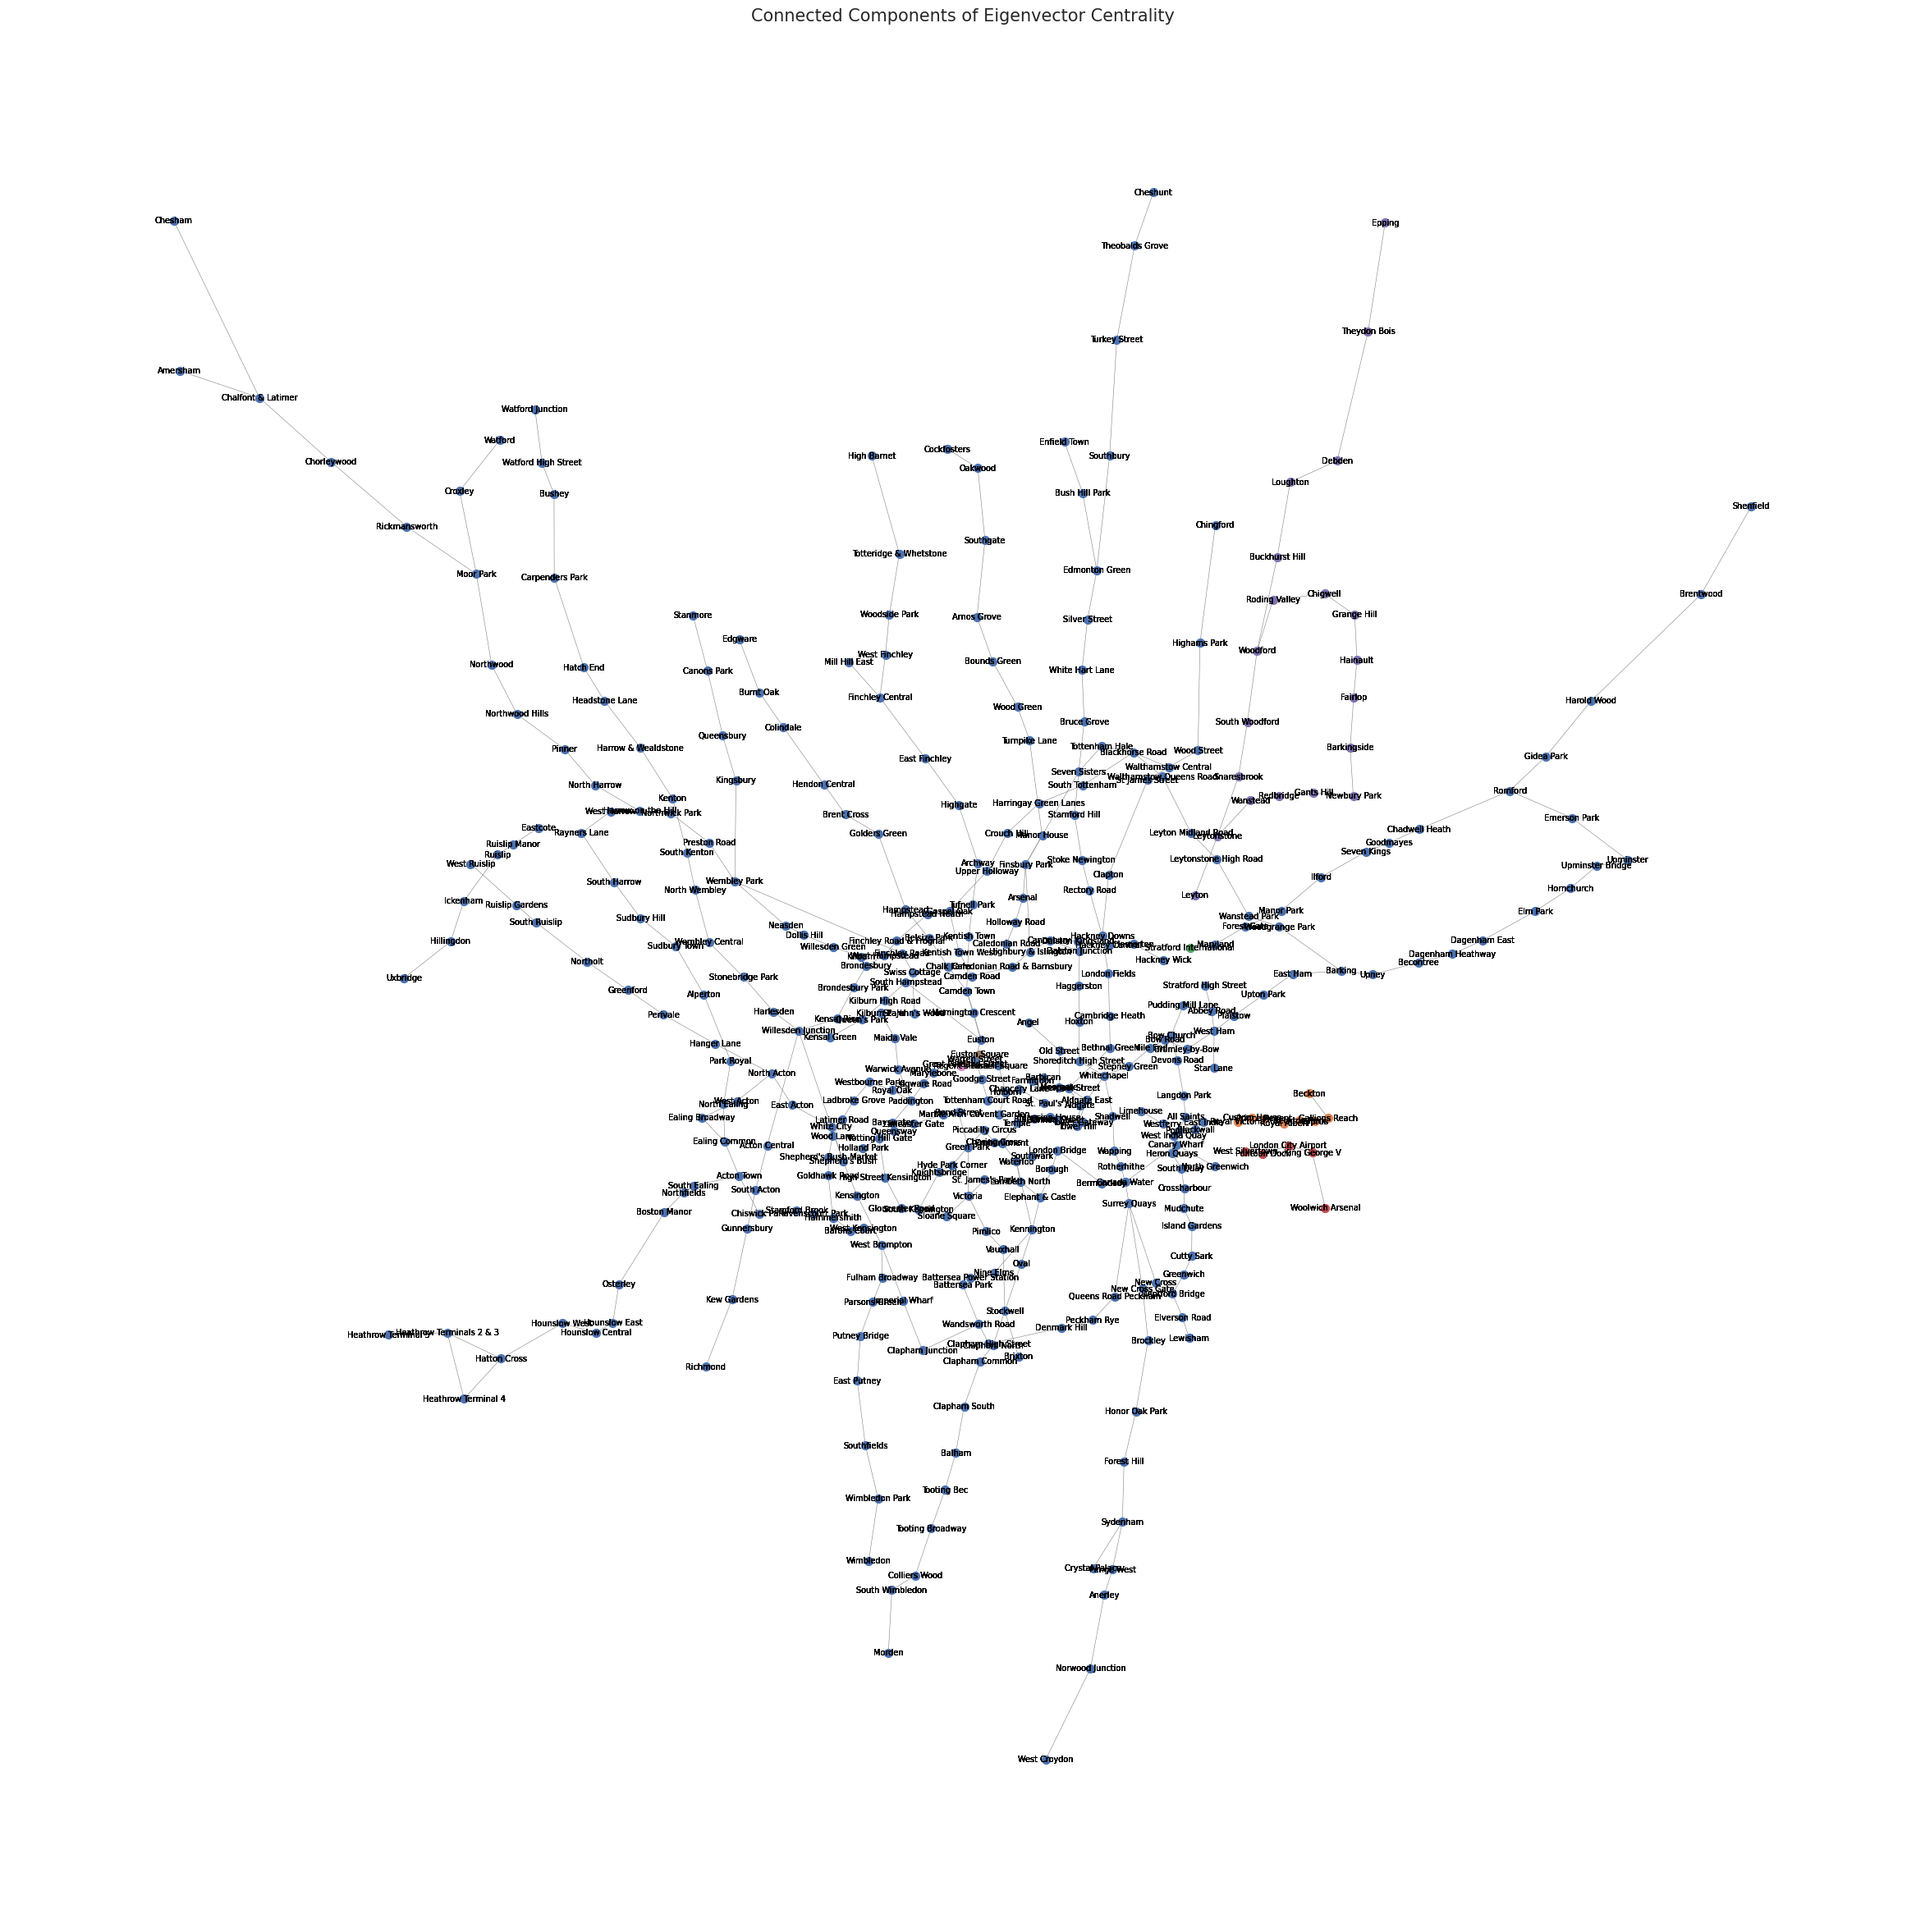

In [59]:
for measure in centrality_functions.keys():
    G_temp = G.copy()
    efficiency = []
    nlcc = []
    
    # Perform node deletion 10 times.
    for i in range(10):
        # Recalculate the centrality of the current graph.
        current_centrality = centrality_functions[measure](G_temp)
        
        # Find the node with the highest centrality.
        max_node = max(current_centrality, key=current_centrality.get)
        
        # Delete the node.
        G_temp.remove_node(max_node)
        
        # Calculate global efficiency and NLCC and add to list.
        efficiency.append(nx.global_efficiency(G_temp))
        nlcc.append(calculate_nlcc(G_temp))
        
    # Add results to results list.
    results_b.append({
        'measure': measure,
        'efficiency': efficiency,
        'nlcc': nlcc
    })

    plot_result_network(G_temp, measure)
    plot_result_network_cc(G_temp, measure)

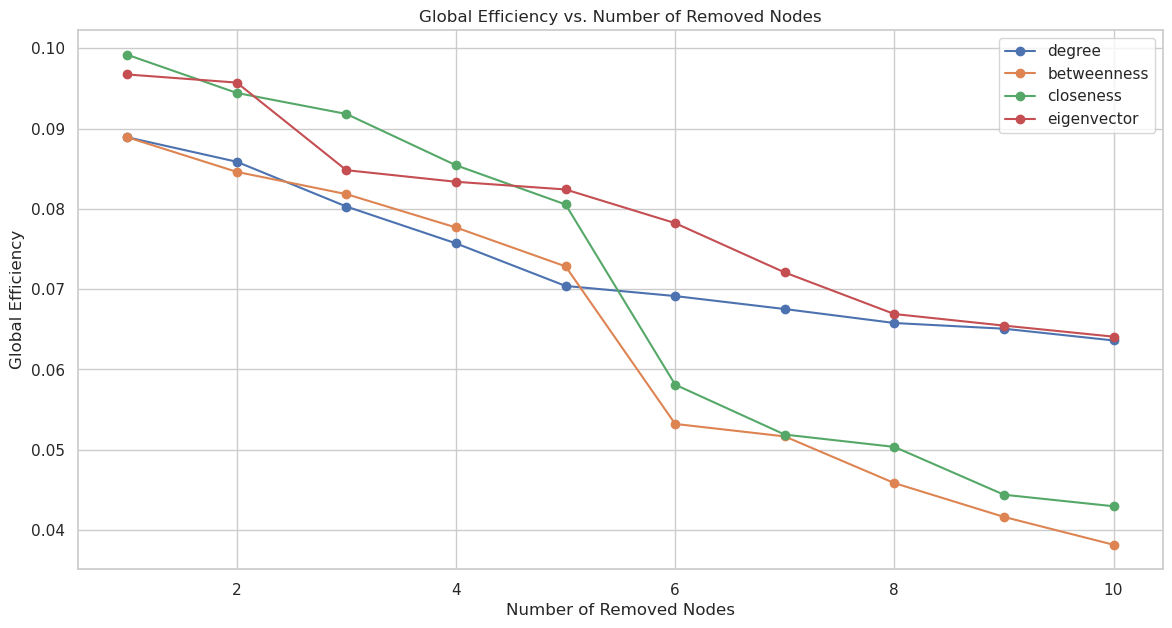

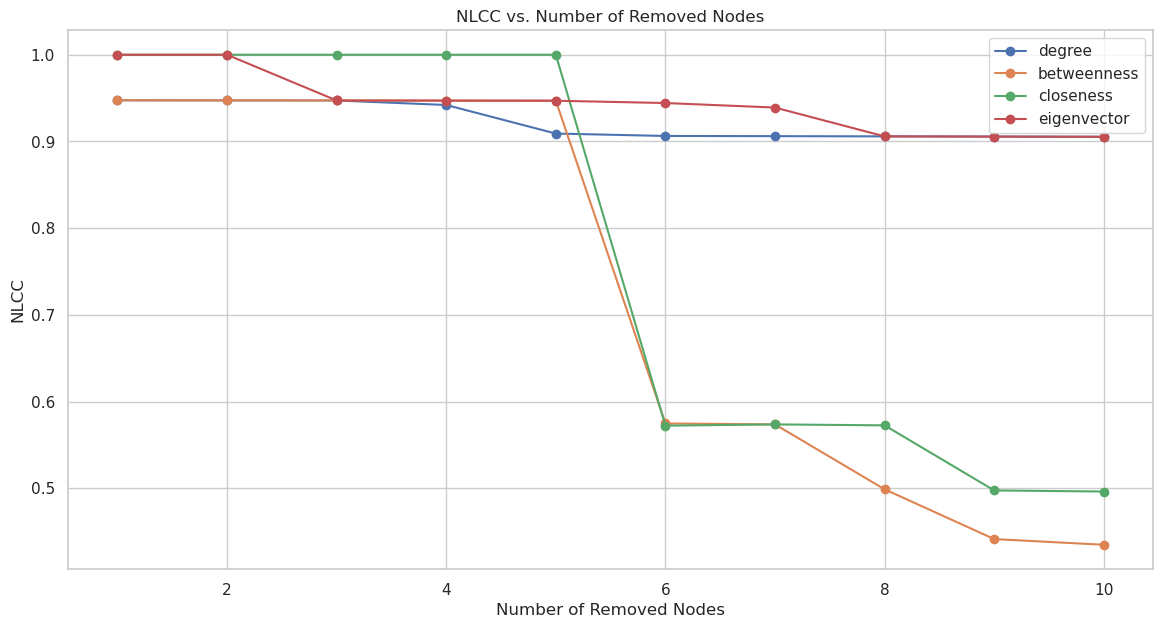

In [60]:
# Global efficiency.
plt.figure(figsize=(14, 7))

# For each centrality measure, plot the global efficiency curve.
for entry in results_b:
    plt.plot(range(1, 11), entry['efficiency'], '-o', label=entry['measure'])

plt.title('Global Efficiency vs. Number of Removed Nodes')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Global Efficiency')
plt.legend()
plt.show()

# NLCC
plt.figure(figsize=(14, 7))

# For each centrality measure, plot the NLCC curve.
for entry in results_b:
    plt.plot(range(1, 11), entry['nlcc'], '-o', label=entry['measure'])

plt.title('NLCC vs. Number of Removed Nodes')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('NLCC')
plt.legend()
plt.show()

## II. Flows: weighted network